In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *

In [2]:
# Global variables and statistics
dataset = 'bm1'
benchmark_name = 'CNN in Keras on MNIST'
num_trials =30


In [3]:
# Read sequential optimization results
tpe_results = {}
iter30_results = {}
iter40_results = {}
opt_secs = 7200
s_path = "./{}/T{}S/".format(dataset, opt_secs)

iter30_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(30)' + '.json')
iter30_results['TPE (hybrid, ETR)'] = load_json(s_path + 'TPE-HLE-EI.HPO_runner.ETR-DecaTercet(30)' + '.json')
iter30_results['TPE'] = load_json(s_path + 'TPE-EI.HPO_runner(30)' + '.json')
iter40_results['S-Div(w/ TPE)'] = load_json(s_path + 'DIV-SEQ.p7div-etr.HPO_runner.ETR-DecaTercet(40)' + '.json')
iter30_results['S-Div(w/ TPE)'] = iter40_results['S-Div(w/ TPE)']

In [4]:
bohb_results  = {}
bohb_results['BOHB'] = load_json('./bm1/bohb_max_budget_9_result' + '.json')
iter30_results['BOHB'] = bohb_results['BOHB']

In [5]:
max_accs = []
for i in range(30):
    max_acc = max(iter30_results['S-Div'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
sdiv_bests = max_accs

S-Div avg. 0.9937 (0.0003)
[0.9938, 0.9938, 0.9936, 0.9937, 0.9933, 0.9934, 0.9932, 0.9938, 0.9938, 0.9943, 0.9937, 0.9934, 0.9943, 0.9943, 0.9936, 0.9934, 0.9939, 0.9938, 0.9943, 0.9933, 0.9936, 0.9938, 0.9936, 0.9936, 0.9937, 0.9939, 0.993, 0.9939, 0.9934, 0.9936]


In [6]:
max_accs = []
for i in range(40):
    max_acc = max(iter40_results['S-Div(w/ TPE)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("S-Div(w/ TPE) avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
sdiv7_bests = max_accs

S-Div(w/ TPE) avg. 0.9938 (0.0004)
[0.9939, 0.9935, 0.9933, 0.994, 0.9933, 0.9933, 0.995, 0.9938, 0.994, 0.9935, 0.9941, 0.9934, 0.9939, 0.9939, 0.9938, 0.9941, 0.9934, 0.9935, 0.9936, 0.9939, 0.9946, 0.9933, 0.9941, 0.9936, 0.9938, 0.9942, 0.9941, 0.9947, 0.9937, 0.9942, 0.9939, 0.9934, 0.9934, 0.9942, 0.9934, 0.9937, 0.9937, 0.9939, 0.9936, 0.9934]


max_accs = []
for i in range(21):
    max_acc = max(iter20_results['TPE (ETR)'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs))) 
tpe_etr_bests = max_accs

In [7]:
max_accs = []
for i in range(30):
    max_acc = max(iter30_results['TPE (hybrid, ETR)'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("TPE (hybrid, ETR) avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
tpe_he_bests = max_accs

TPE (hybrid, ETR) avg. 0.9932 (0.0005)
[0.9932, 0.9937, 0.9935, 0.9932, 0.9932, 0.9928, 0.9928, 0.9929, 0.9927, 0.9941, 0.9933, 0.9941, 0.9936, 0.9931, 0.9936, 0.9927, 0.9928, 0.9934, 0.9926, 0.9938, 0.9937, 0.9932, 0.9931, 0.9931, 0.992, 0.993, 0.9934, 0.9935, 0.9934, 0.9935]


In [8]:
max_accs = []
for i in range(30):
    max_acc = max(iter30_results['TPE'][str(i)]['accuracy'])
    max_accs.append(max_acc)
print("TPE avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
tpe_bests = max_accs

TPE avg. 0.9930 (0.0005)
[0.9935, 0.9923, 0.993, 0.9931, 0.9927, 0.993, 0.9925, 0.9926, 0.9934, 0.9917, 0.9931, 0.993, 0.9931, 0.9934, 0.993, 0.9935, 0.9934, 0.9924, 0.9928, 0.9928, 0.9934, 0.9927, 0.9935, 0.9931, 0.9935, 0.994, 0.9933, 0.9925, 0.9935, 0.9933]


In [9]:
from scipy.stats import ttest_ind
print("S-Div vs. TPE p-value: {:.8f}".format(ttest_ind(sdiv_bests, tpe_bests)[1]))

S-Div vs. TPE p-value: 0.00000005


draw_success_rate_fig(iter30_results, 0.993, 60*1 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=30,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='30 runs, Max epoch 9, Target goal accuary: 99.3%',
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

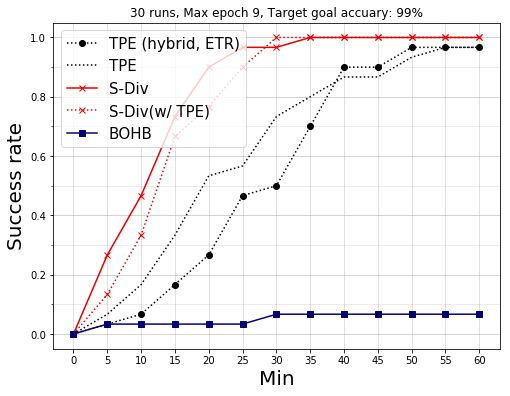

In [10]:
draw_success_rate_fig(iter30_results, 0.99, 60 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=30,
                                              div=[ 'S-Div', 'S-Div(w/ TPE)', 'BOHB'], indi=['TPE (hybrid, ETR)', 'TPE'], legend={'loc': 2}, title='30 runs, Max epoch 9, Target goal accuary: 99%',
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

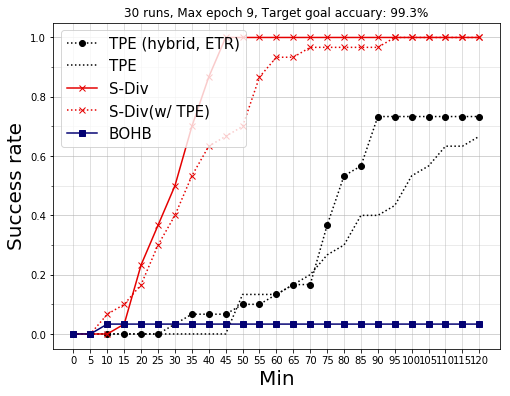

In [22]:
draw_success_rate_fig(iter30_results, 0.993, 120 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=30,
                                              div=[ 'S-Div', 'S-Div(w/ TPE)', 'BOHB'], indi=['TPE (hybrid, ETR)', 'TPE'], legend={'loc': 2}, title='30 runs, Max epoch 9, Target goal accuary: 99.3%',
                                                 width=8, height=6)

draw_best_error_curve(iter30_results, ["S-Div"], 30, ylim=(.005, .1), xlim=(0, 100+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

draw_best_error_curve(iter30_results, ["S-Div"] + ['TPE (hybrid, ETR)', 'TPE'], 30, ylim=(.005, .5), xlim=(0, 100+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

div21_results = {}
opt_secs = 18000
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div21_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.(21)' + '.json')

max_accs = []
for i in range(21):
    max_acc = max(div21_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

draw_success_rate_fig(div21_results, 0.995, 5 * 60, 
                                              x_unit='Min', step_size=30,
                                              num_runs=21,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='21 runs, Max epoch 27, Target goal accuary: 99.5%',
                                                 width=8, height=6)

draw_best_error_curve(div21_results, ["S-Div"], 21, ylim=(.003, .5), xlim=(0, 60*5+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

div10_results = {}
opt_secs = 36000
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div10_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(18)' + '.json')

max_accs = []
for i in range(18):
    max_acc = max(div10_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

draw_success_rate_fig(div10_results, 0.995, 10, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=18,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='10 runs, Max epoch 81, Target goal accuary: 99.5%',
                                                 width=8, height=6)

draw_success_rate_fig(div10_results, 0.996, 10, 
                                              x_unit='Hour', step_size=1,
                                              num_runs=18,
                                              div=[ 'S-Div'], legend={'loc': 2}, title='10 runs, Max epoch 81, Target goal accuary: 99.6%',
                                                 width=8, height=6)

draw_best_error_curve(div10_results, ["S-Div"], 10, ylim=(.003, .5), xlim=(0, 60*10+1), 
                      summary=True, x_steps=30, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

In [12]:
max_accs = []
bad_exps = []
soso_exps = []
good_exps = []
for i in range(100):
    max_acc = max(bohb_results['BOHB'][str(i)]['accuracy'])
    if max_acc < 0.9:
        bad_exps.append(i)
    elif max_acc >= 0.99:
        good_exps.append(i)
    else:
        soso_exps.append(i)
    max_accs.append(max_acc)
print("BOHB avg. {:.4f} ({:.4f})\n{}".format(np.mean(max_accs), np.std(max_accs), max_accs))
print("bad (< 0.9) experiments #{}: {}".format(len(bad_exps), bad_exps))
print("good (>=0.99) experiments #{}: {}".format(len(good_exps), good_exps))
bohb_bests = max_accs

BOHB avg. 0.8687 (0.2276)
[0.6943, 0.8812, 0.973, 0.9808, 0.8498, 0.9889, 0.308, 0.9913, 0.9897, 0.9889, 0.5573, 0.4895, 0.973, 0.9868, 0.9865, 0.9901, 0.8165, 0.9901, 0.9879, 0.6436, 0.1524, 0.9702, 0.1135, 0.9133, 0.9809, 0.5749, 0.896, 0.9681, 0.9877, 0.9947, 0.9812, 0.9859, 0.6734, 0.9908, 0.9893, 0.9917, 0.9687, 0.9928, 0.9882, 0.959, 0.9692, 0.9892, 0.5025, 0.6146, 0.9696, 0.687, 0.9875, 0.9889, 0.9128, 0.9701, 0.9595, 0.9825, 0.9703, 0.9878, 0.6019, 0.9815, 0.7534, 0.9156, 0.9713, 0.7707, 0.9827, 0.9816, 0.1135, 0.9931, 0.9785, 0.9858, 0.9904, 0.9105, 0.9766, 0.9776, 0.9655, 0.9636, 0.9829, 0.9553, 0.9952, 0.9908, 0.9701, 0.9909, 0.9723, 0.1135, 0.9822, 0.9594, 0.99, 0.8966, 0.4981, 0.3504, 0.9553, 0.9861, 0.9937, 0.9713, 0.1135, 0.98, 0.9898, 0.9816, 0.9614, 0.93, 0.98, 0.9732, 0.9826, 0.9763]
bad (< 0.9) experiments #25: [0, 1, 4, 6, 10, 11, 16, 19, 20, 22, 25, 26, 32, 42, 43, 45, 54, 56, 59, 62, 79, 83, 84, 85, 90]
good (>=0.99) experiments #14: [7, 15, 17, 29, 33, 35, 37, 63

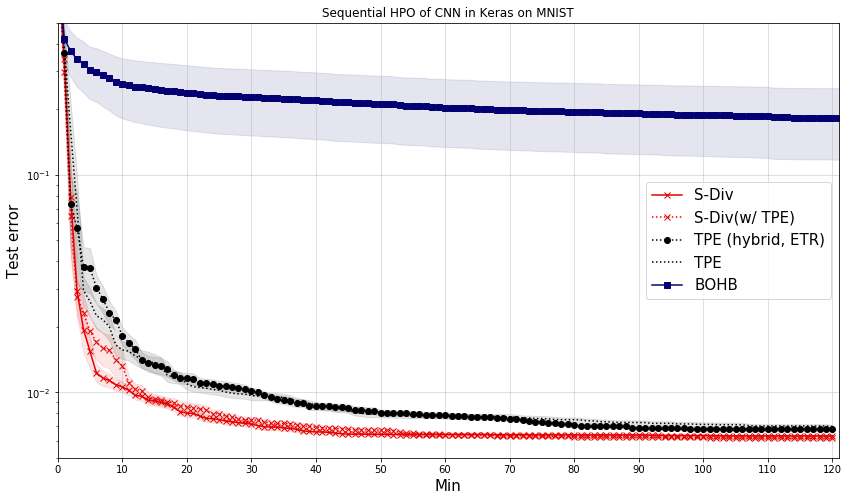

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [23]:
iter30_results['BOHB'] = bohb_results['BOHB']
draw_best_error_curve(iter30_results, ["S-Div", 'S-Div(w/ TPE)' ] + ['TPE (hybrid, ETR)', 'TPE', 'BOHB'], 30, ylim=(.005, .5), xlim=(0, 120+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

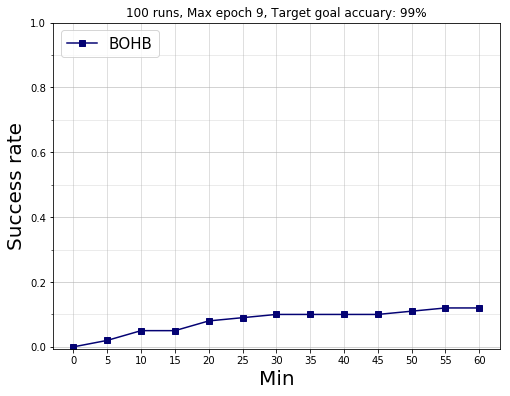

In [14]:
draw_success_rate_fig(bohb_results, 0.99, 60 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=100,
                                              div=[ 'BOHB'],  legend={'loc': 2}, title='100 runs, Max epoch 9, Target goal accuary: 99%',
                                                 width=8, height=6)

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

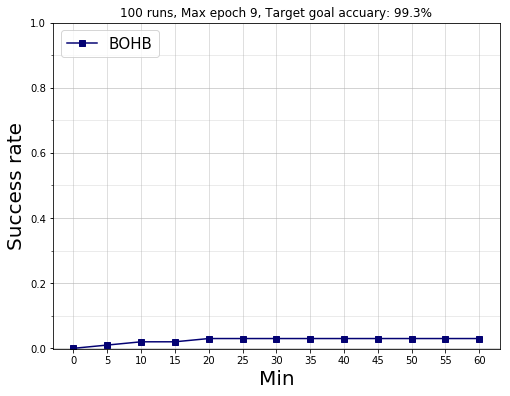

In [15]:
draw_success_rate_fig(bohb_results, 0.993, 60 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=100,
                                              div=[ 'BOHB'],  legend={'loc': 2}, title='100 runs, Max epoch 9, Target goal accuary: 99.3%',
                                                 width=8, height=6)

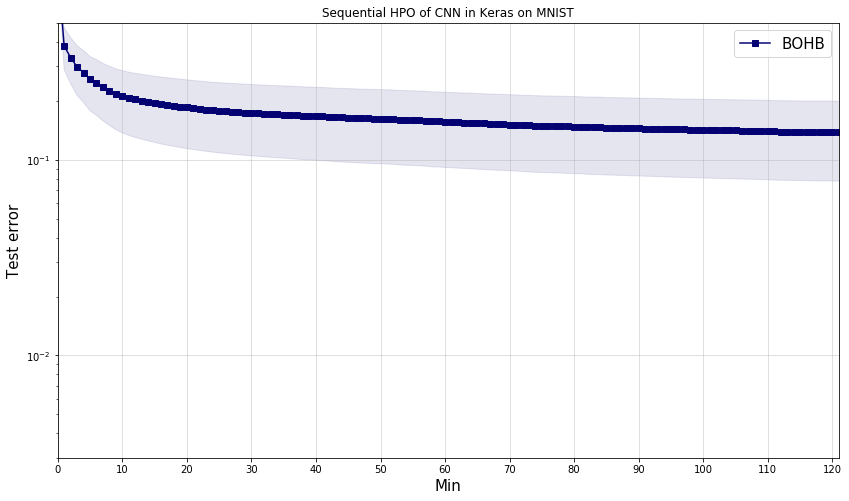

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [16]:
draw_best_error_curve(bohb_results, ["BOHB"], 100, ylim=(.003, .5), xlim=(0, 60*2+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))

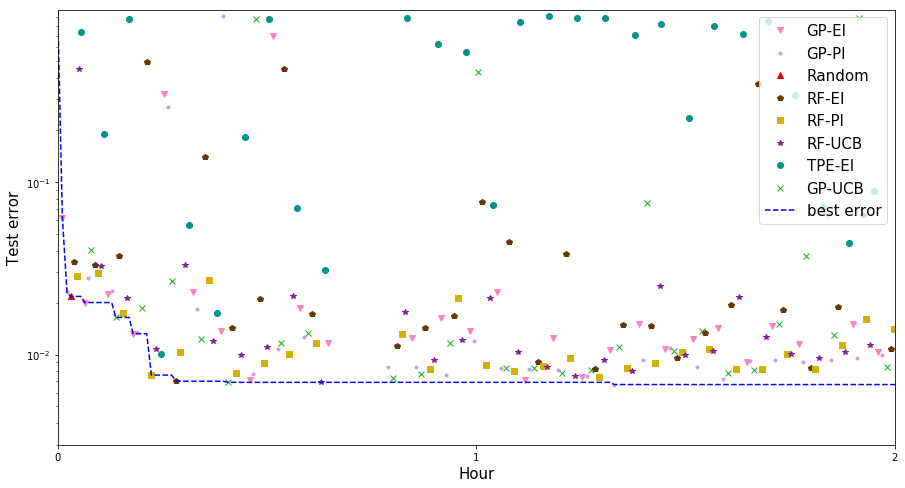

In [28]:
draw_trials_curve(iter30_results, 'S-Div(w/ TPE)', 5, ylim=(.003, .99), xlim=(0, 2), 
                  width=15, height=8, loc=1 )

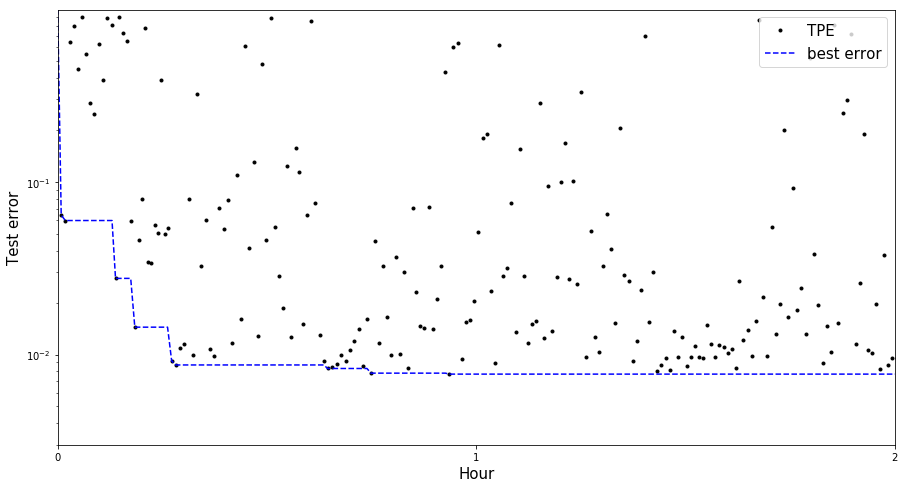

In [18]:
draw_trials_curve(iter30_results, 'TPE', 1, ylim=(.003, .99), xlim=(0, 2), 
                  width=15, height=8, loc=1)

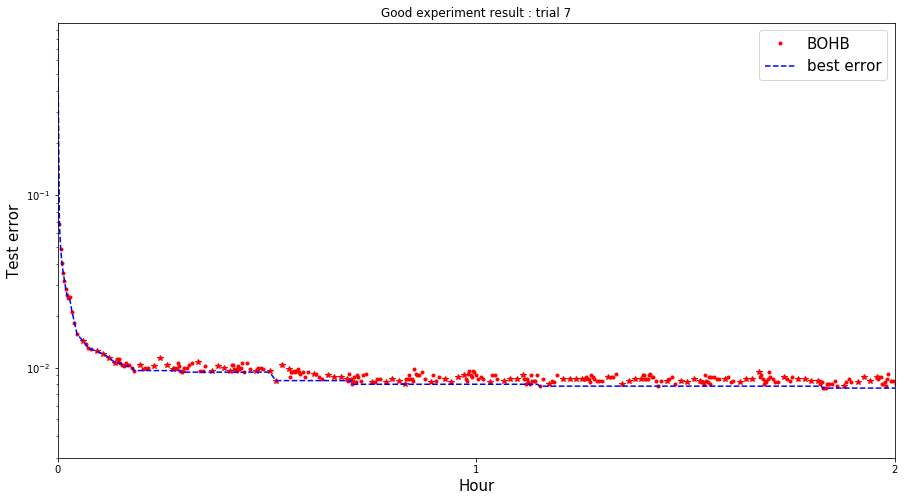

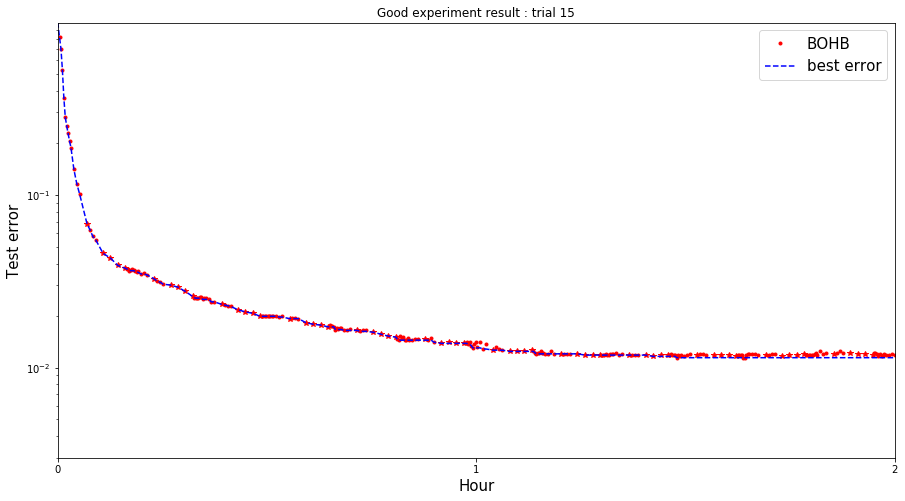

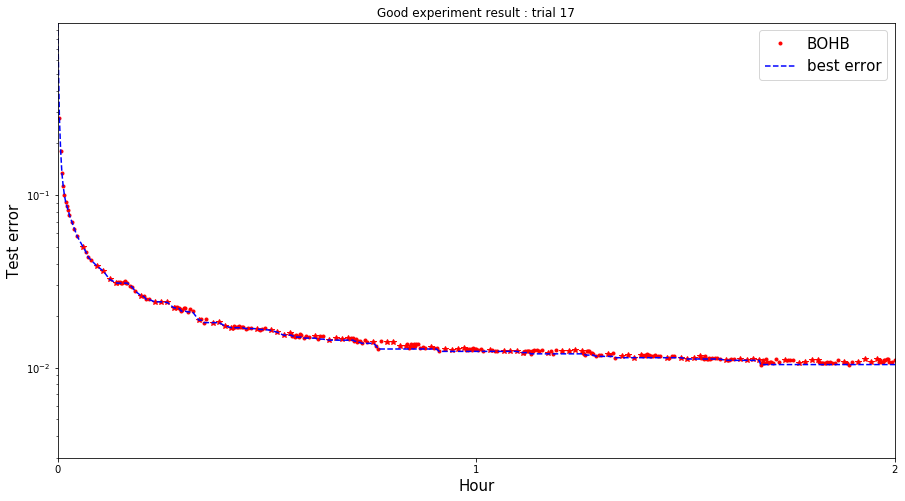

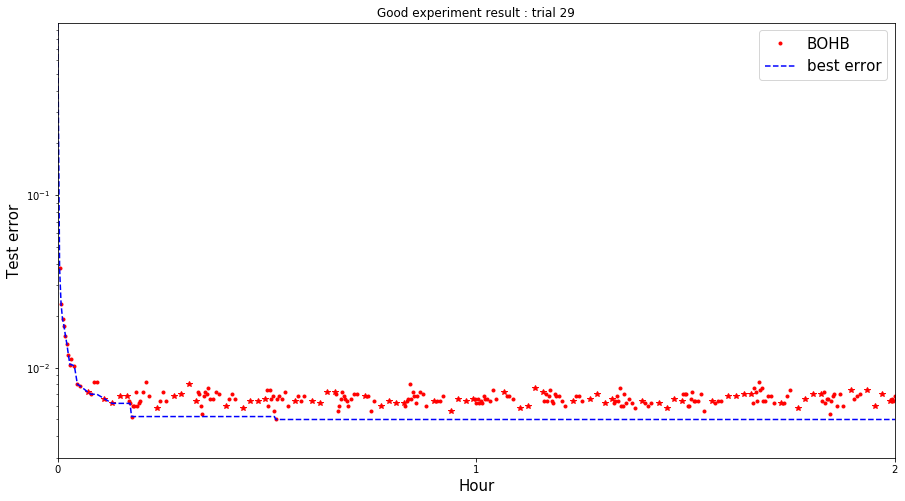

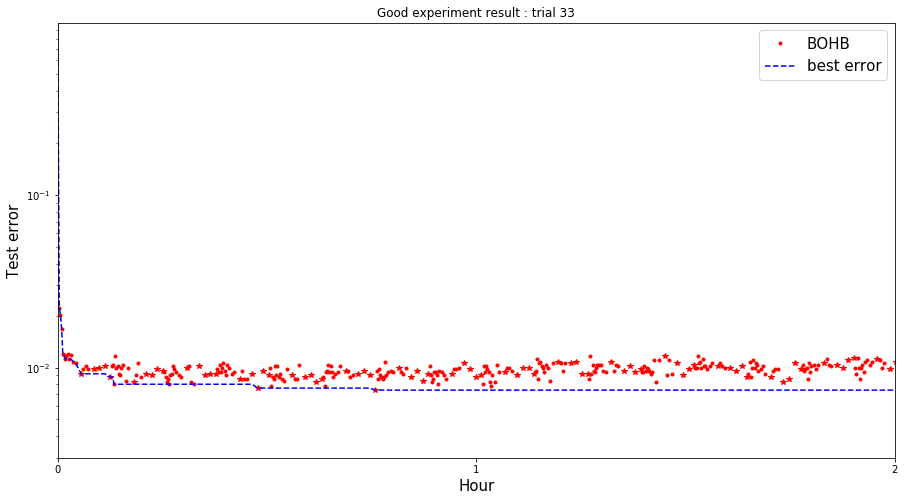

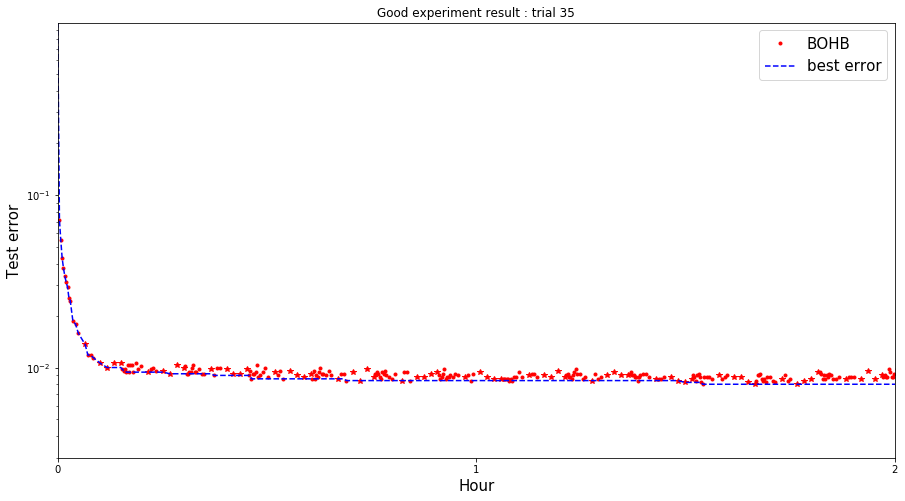

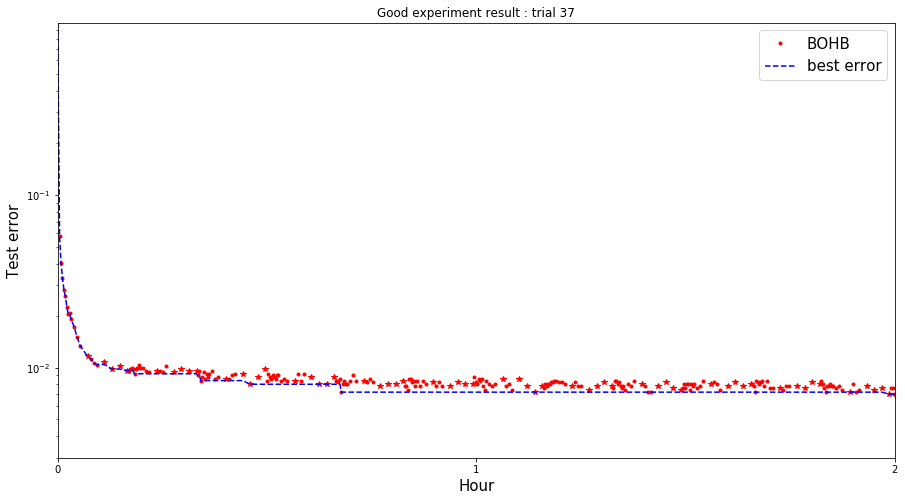

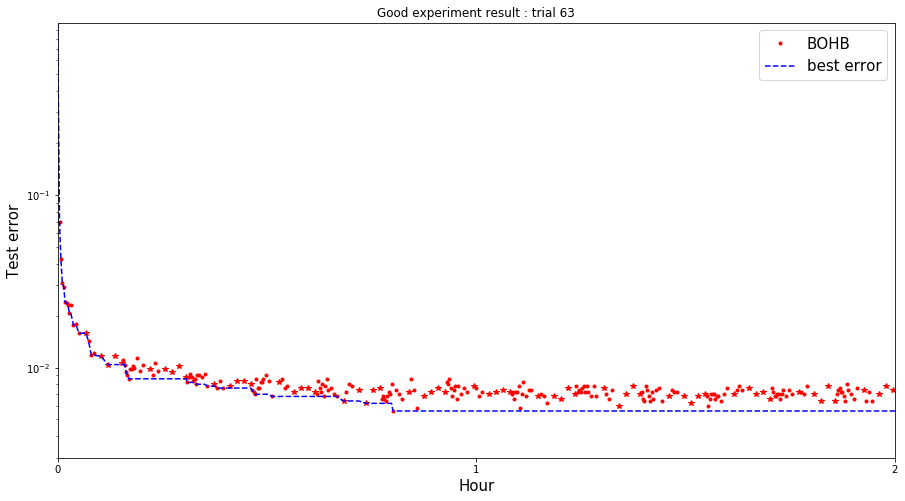

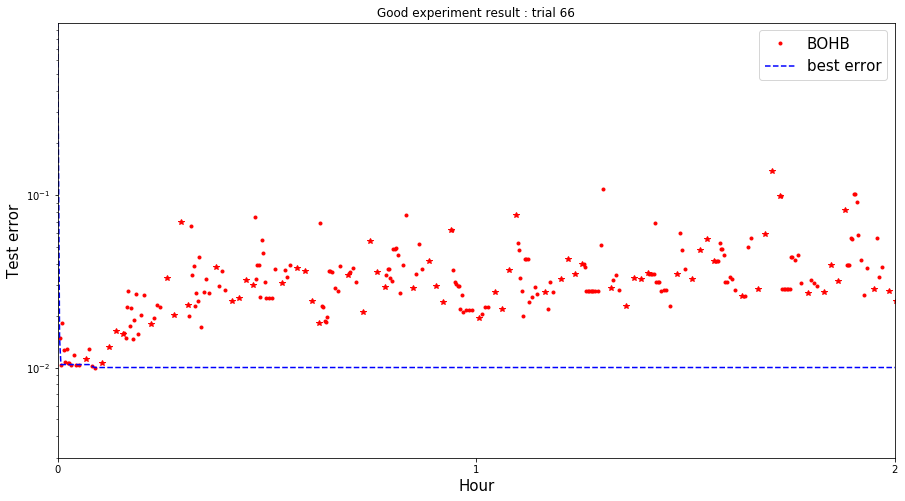

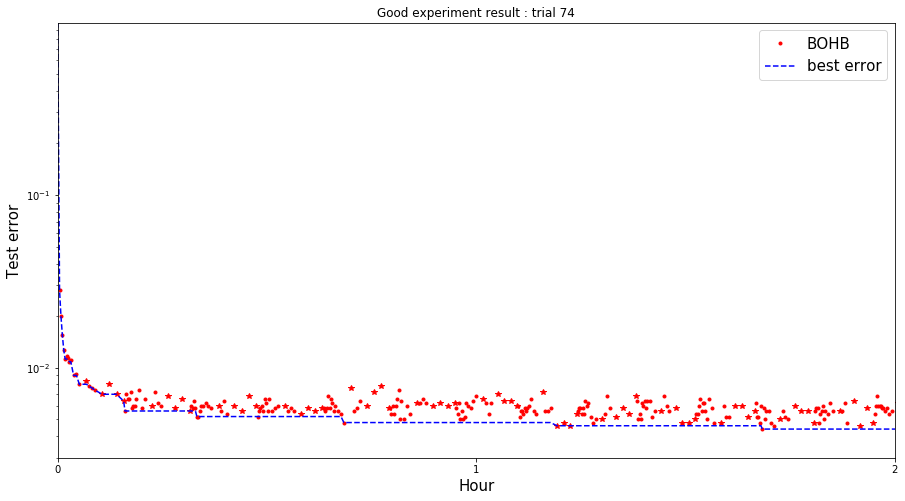

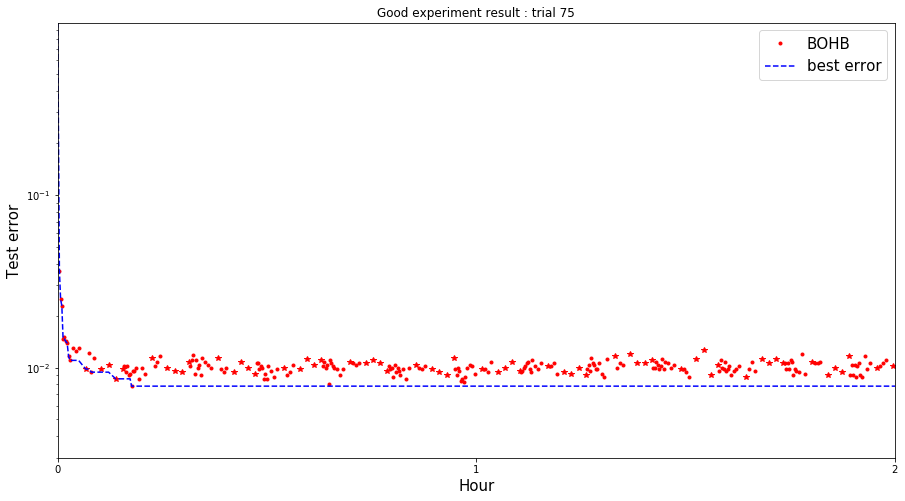

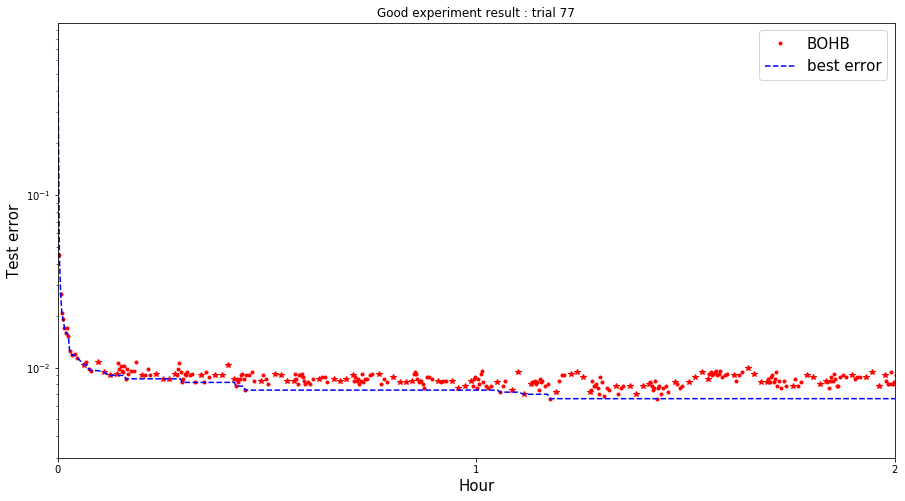

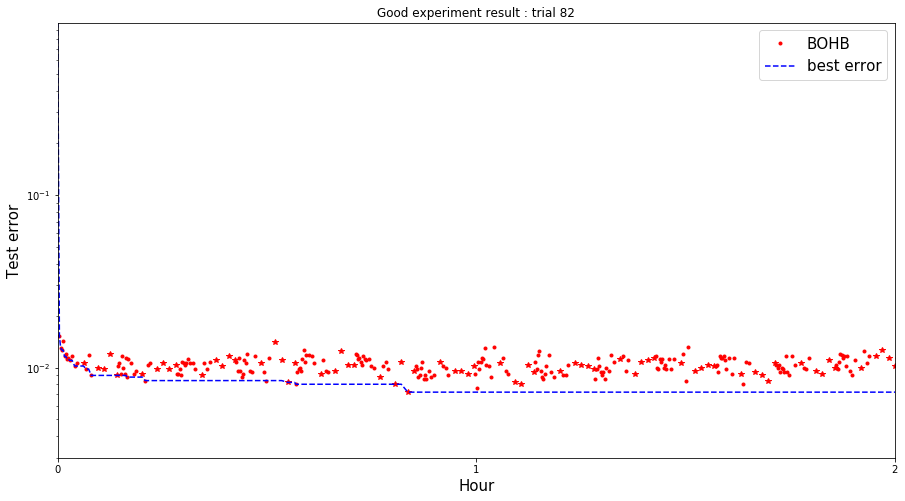

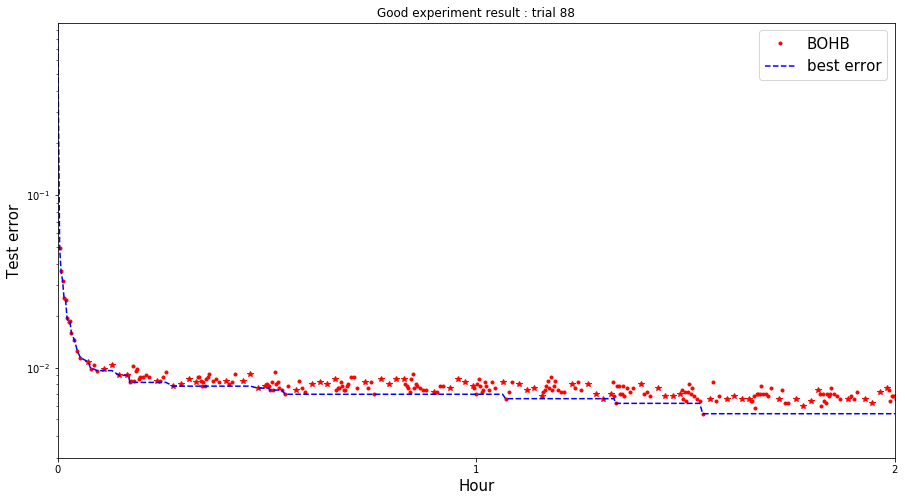

In [19]:
for i in good_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.003, .99), xlim=(0, 2),  title='Good experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )

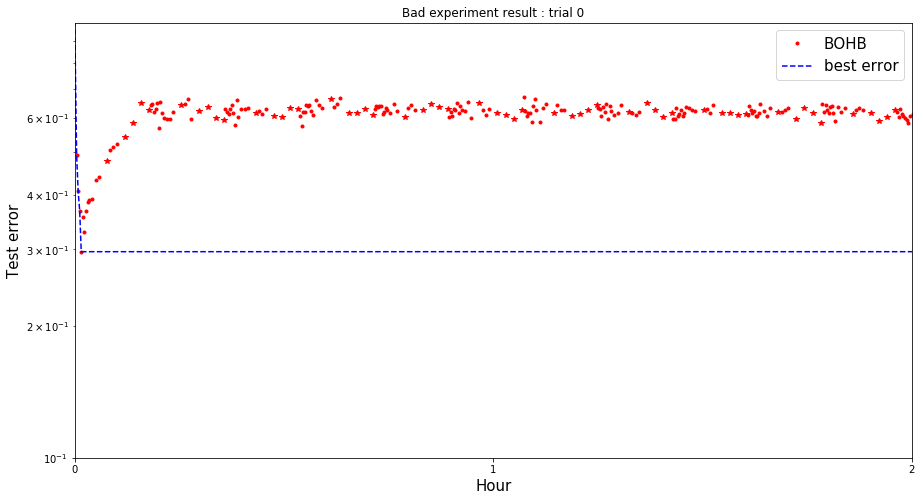

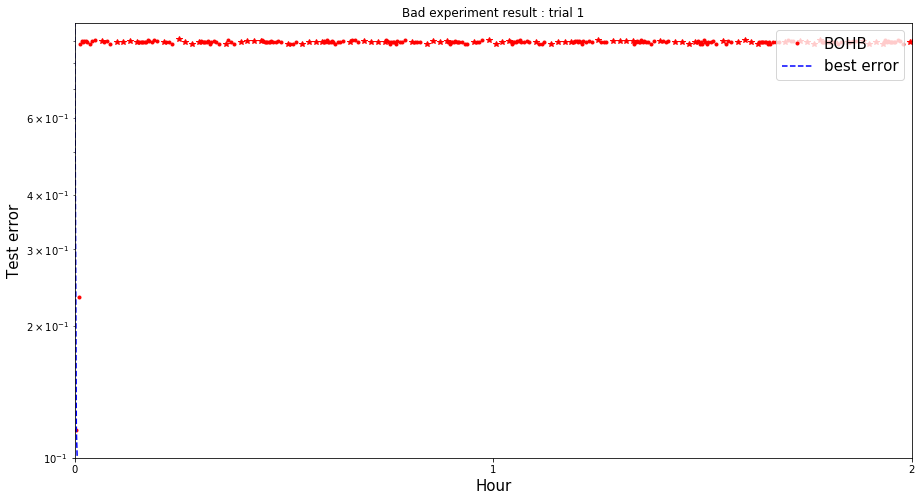

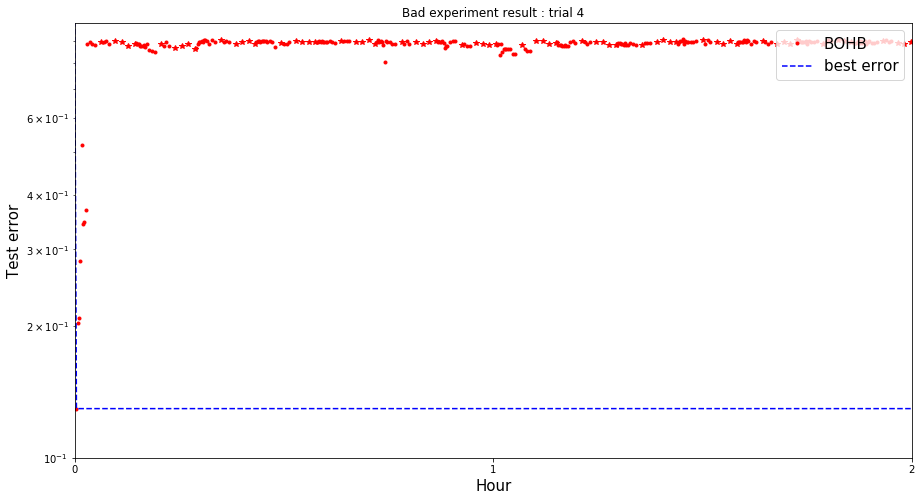

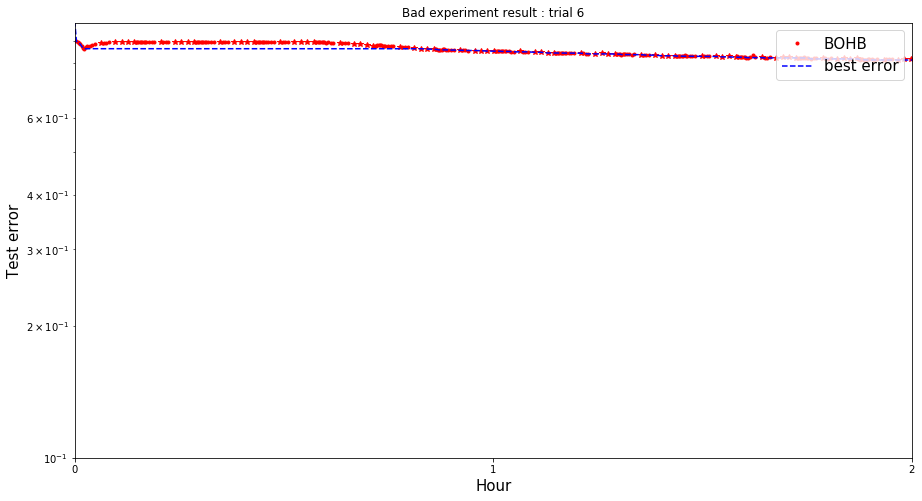

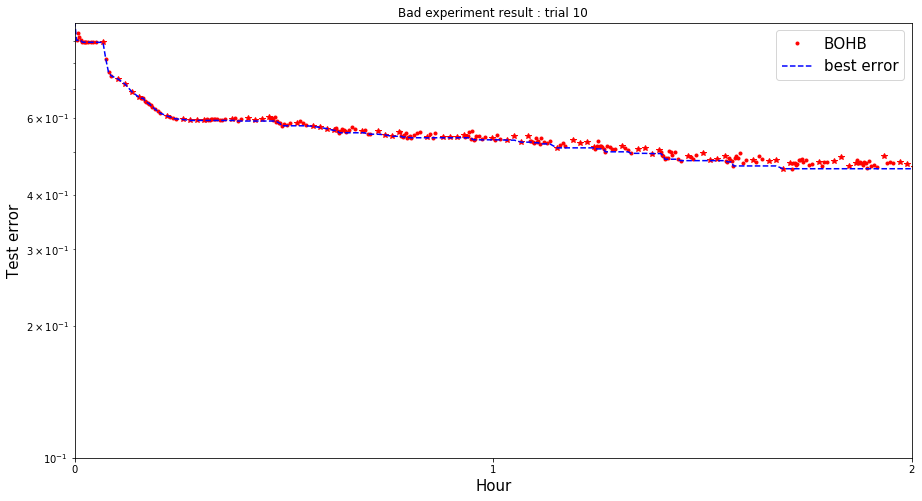

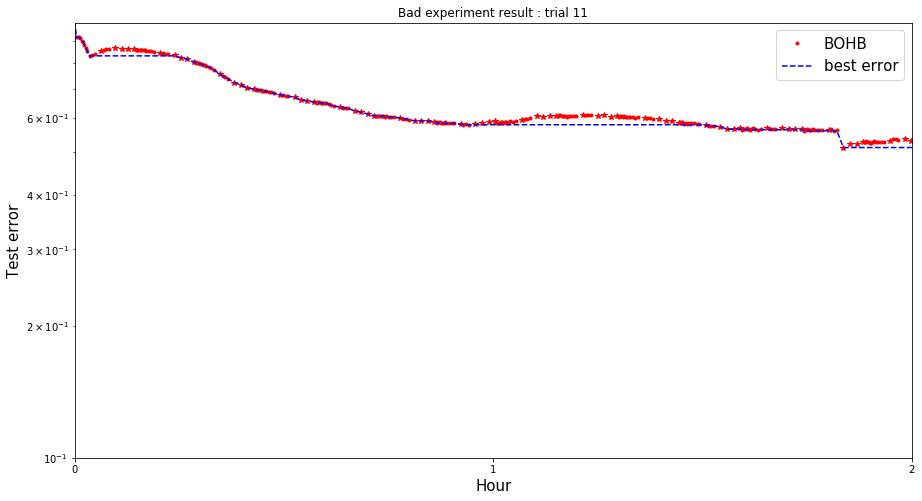

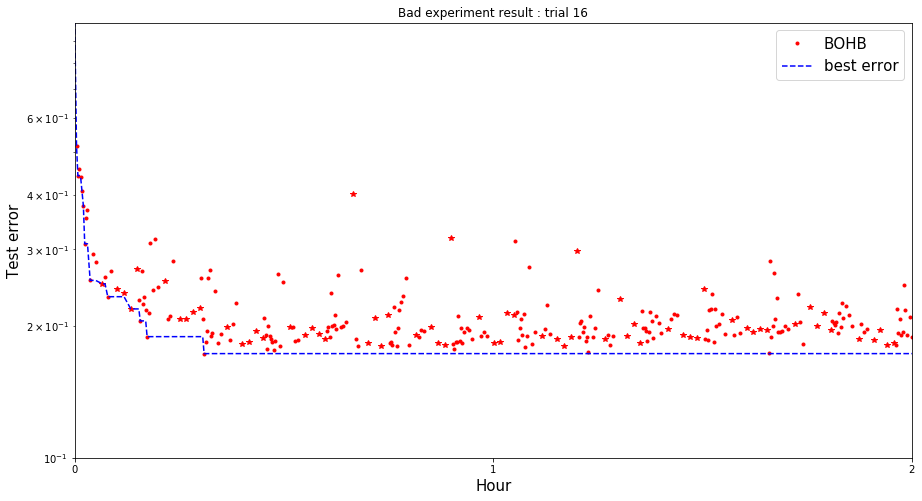

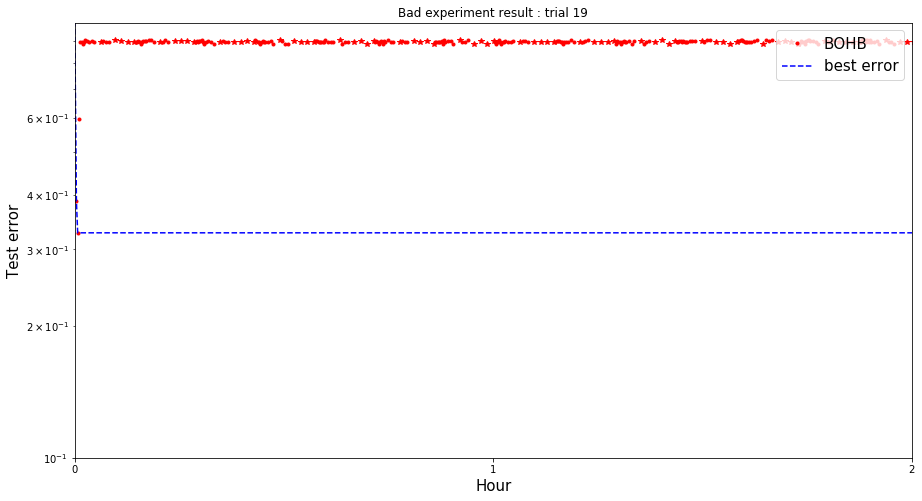

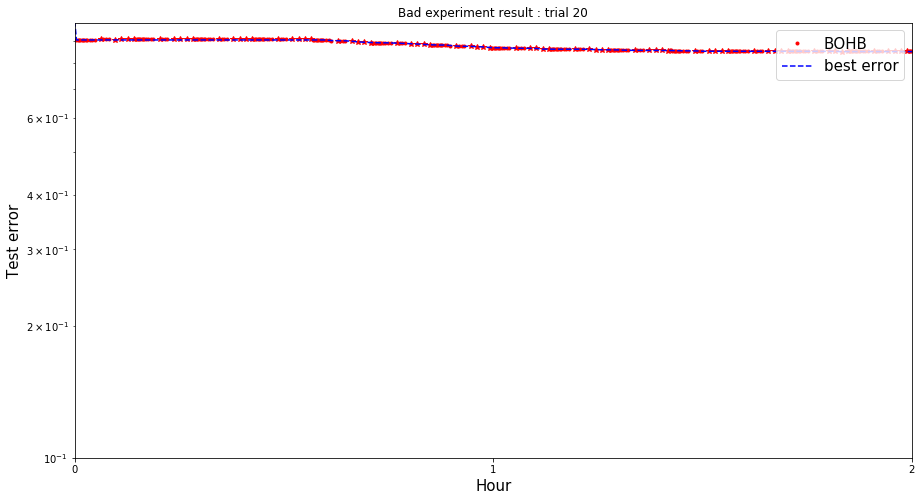

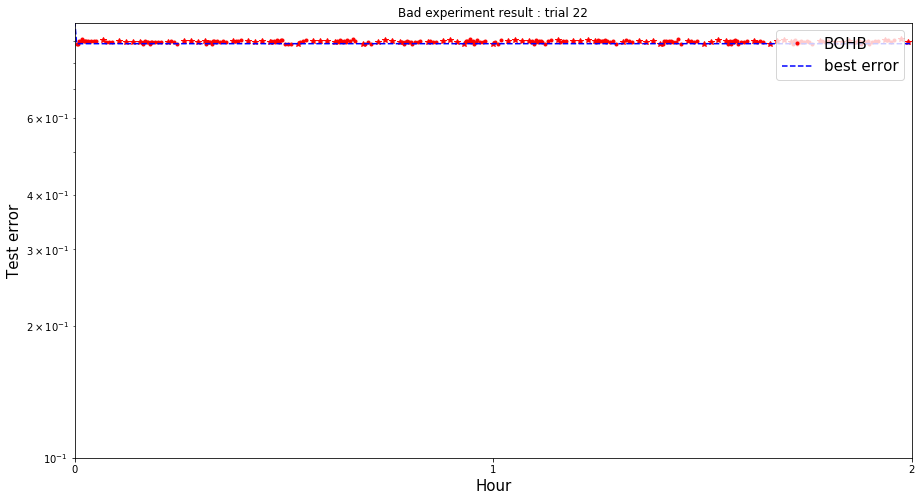

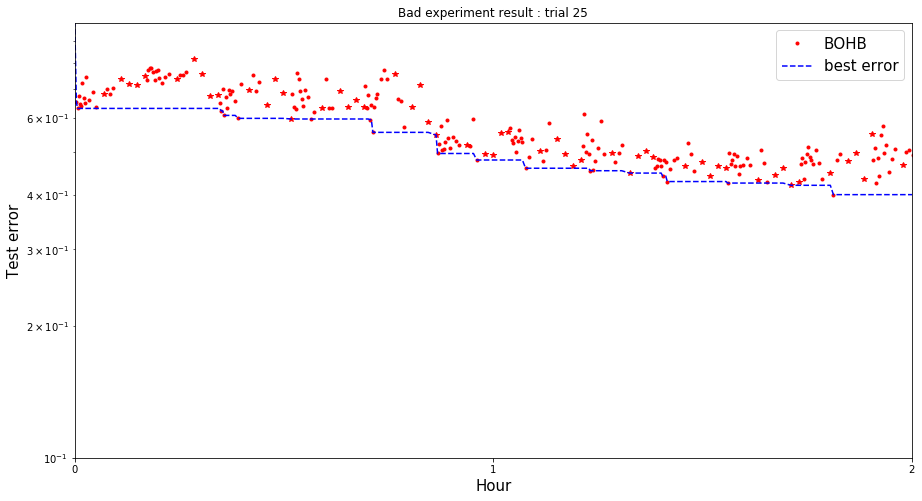

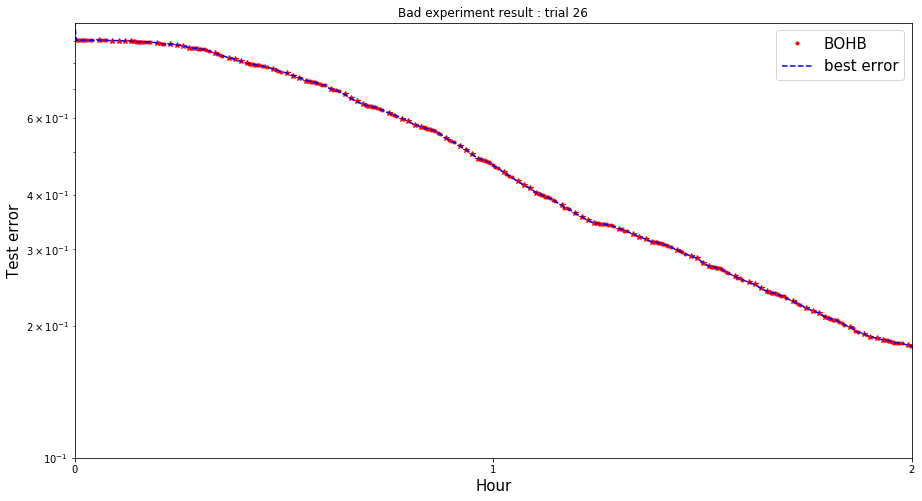

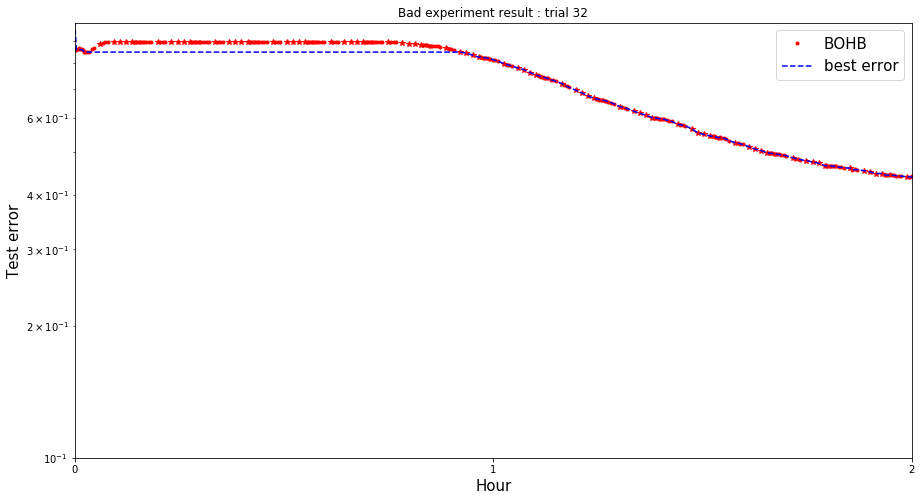

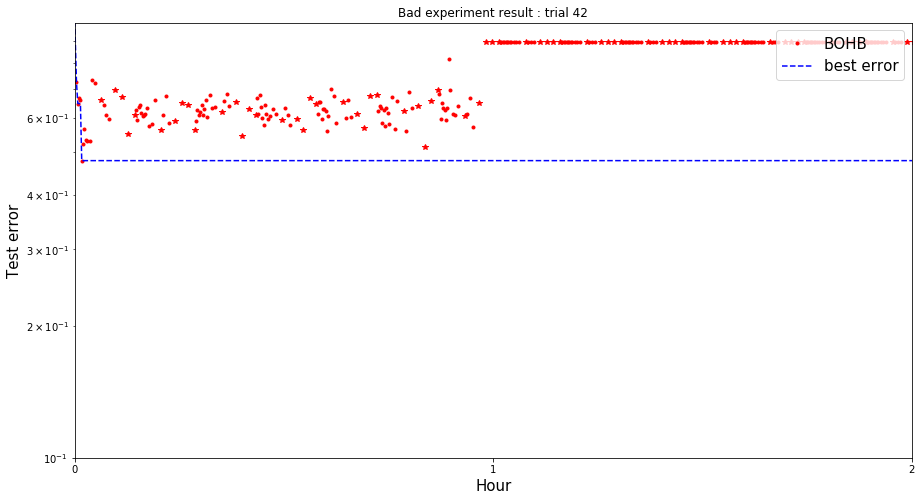

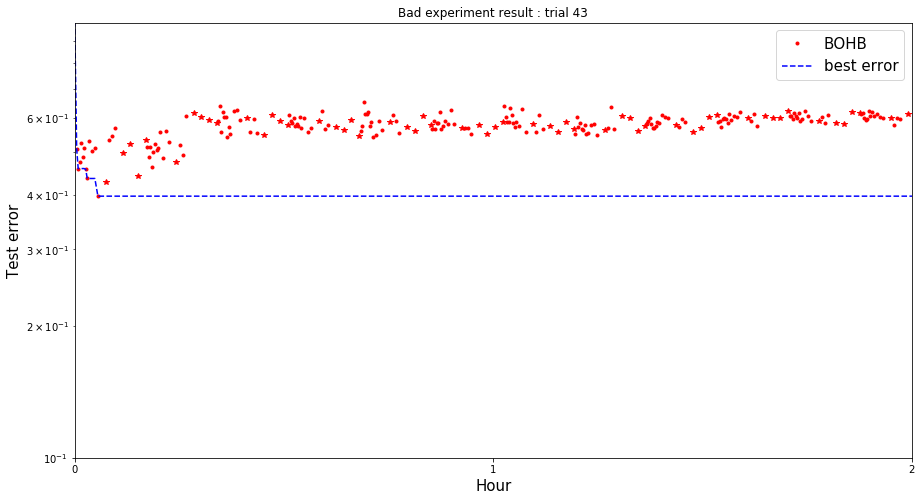

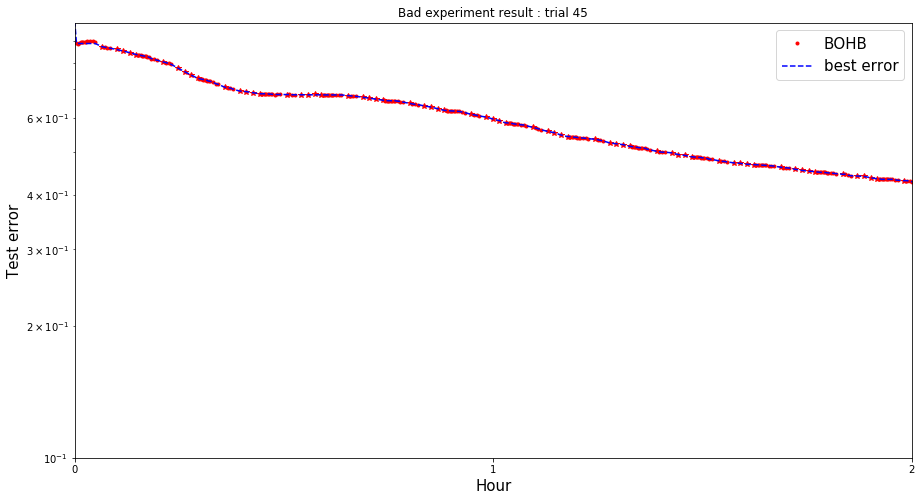

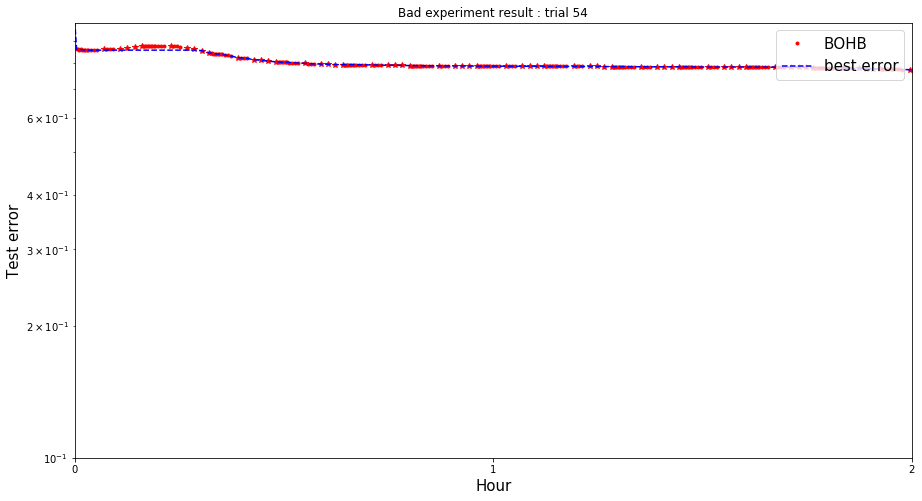

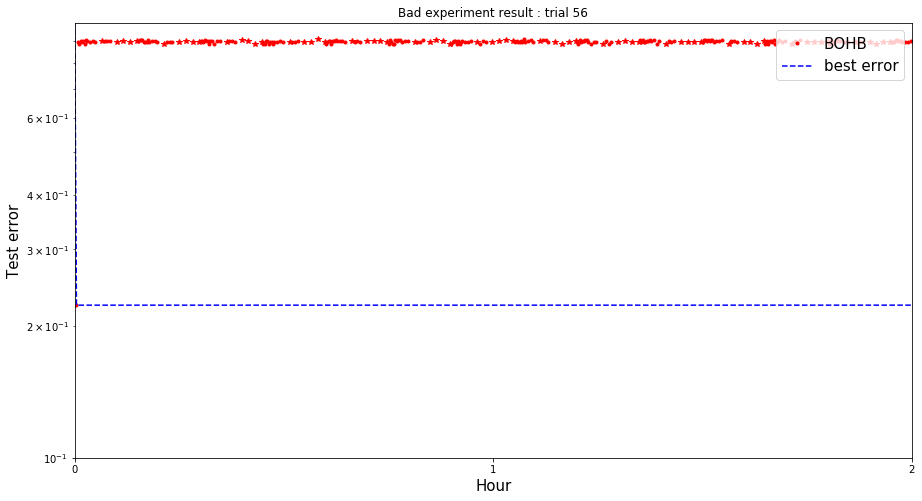

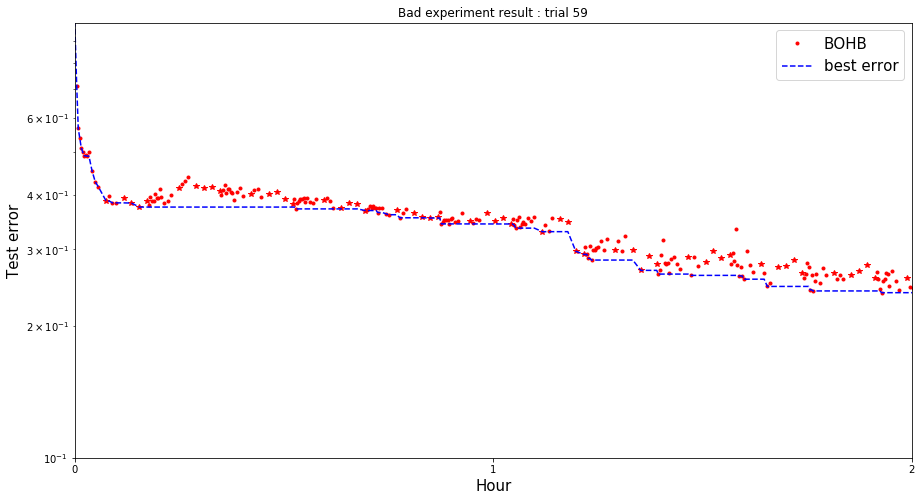

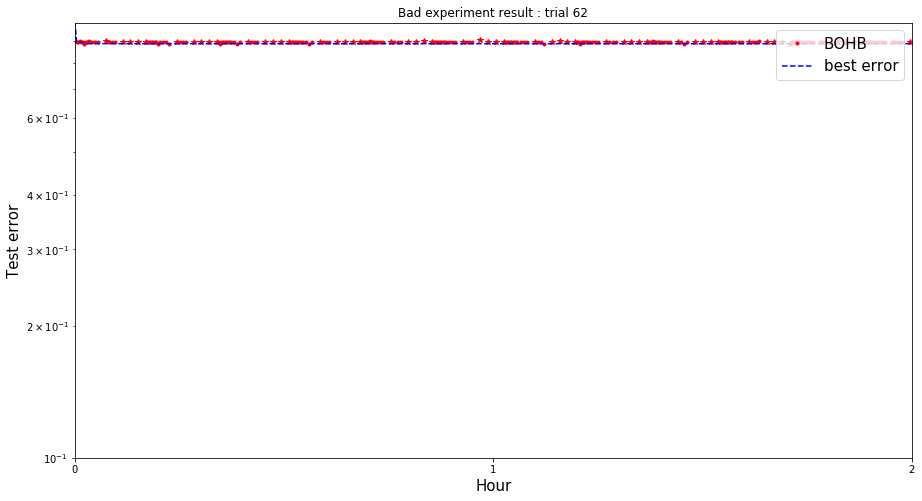

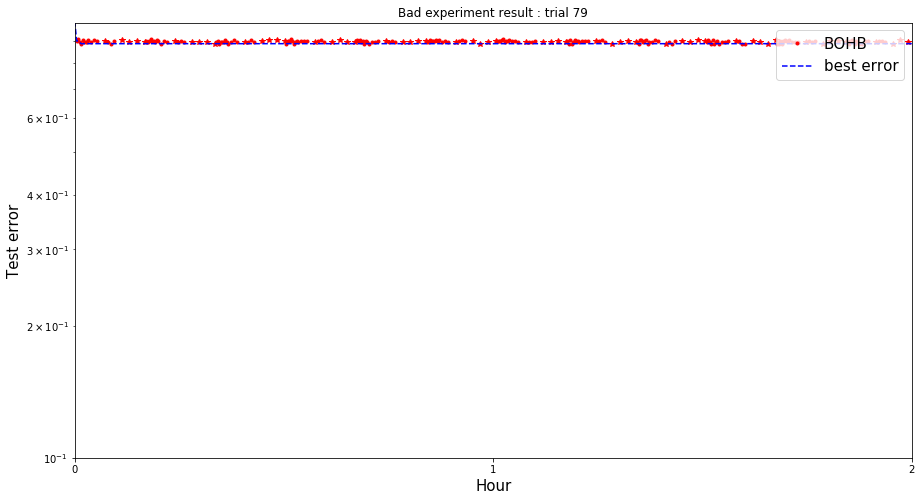

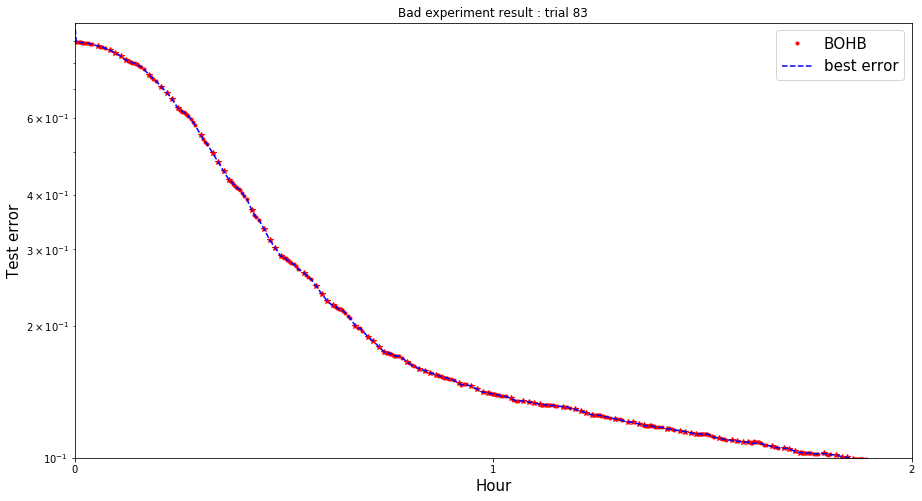

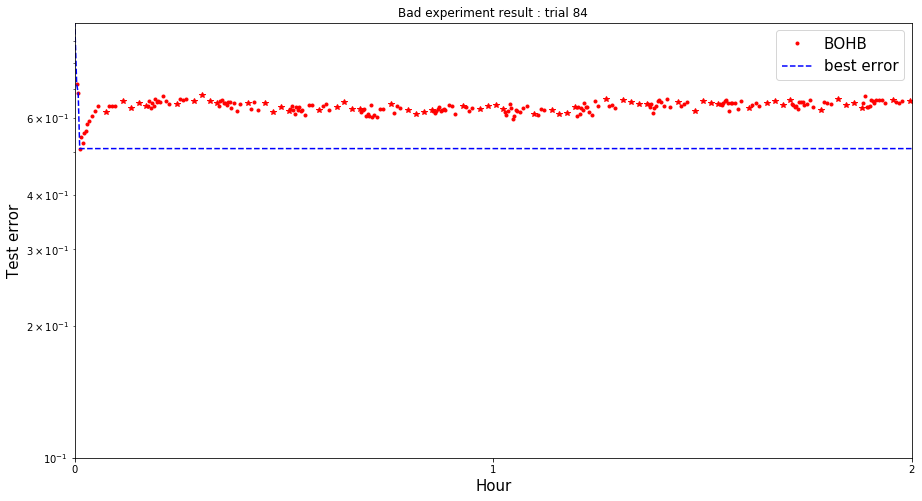

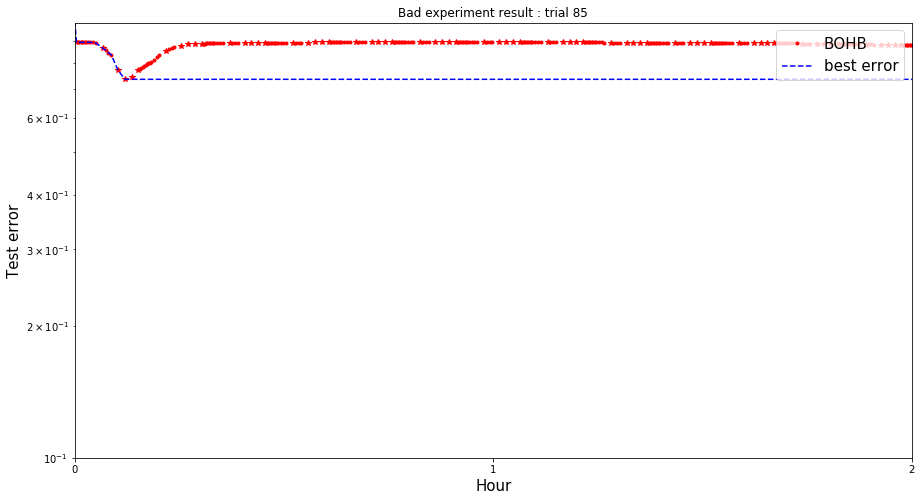

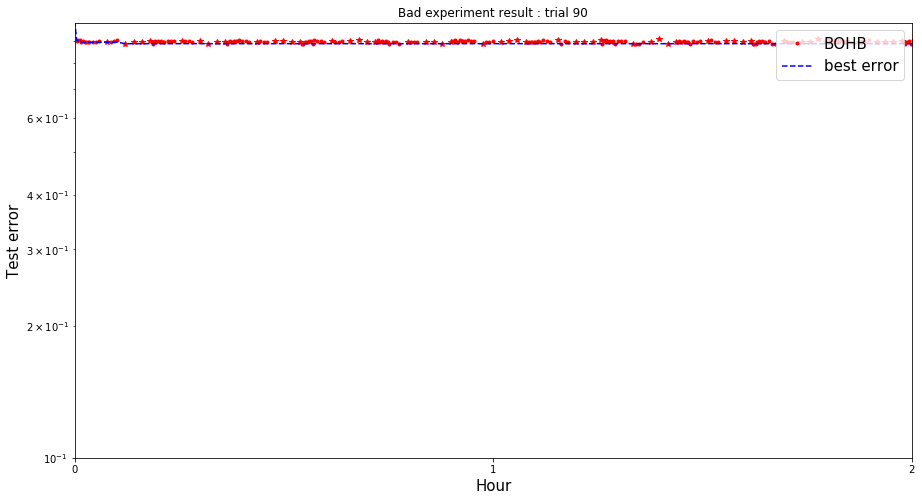

In [20]:
for i in bad_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.1, .99), xlim=(0, 2),  title='Bad experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )

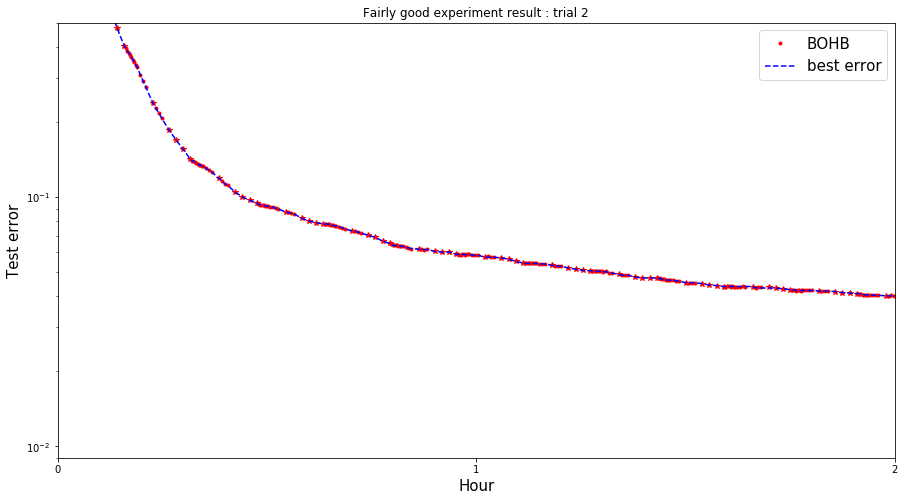

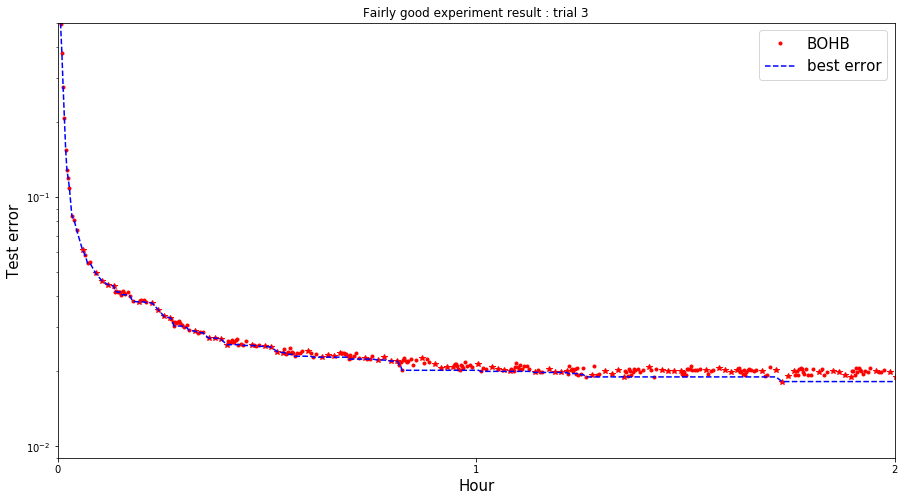

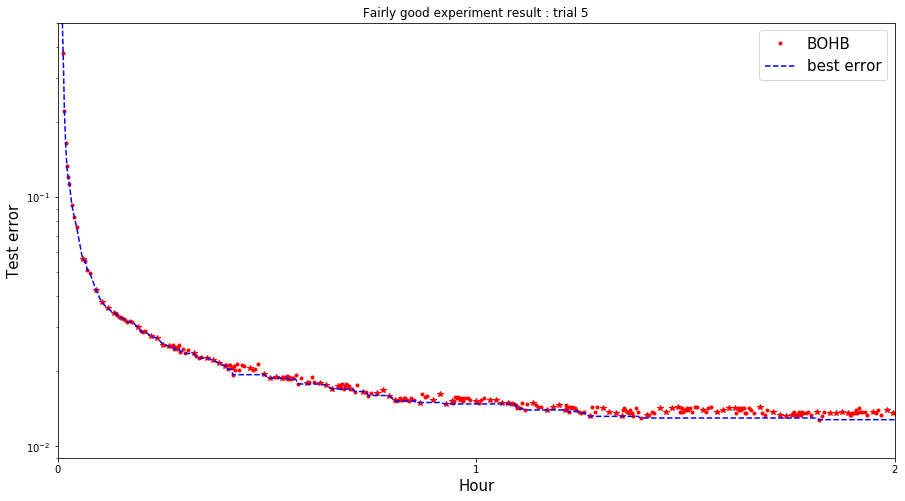

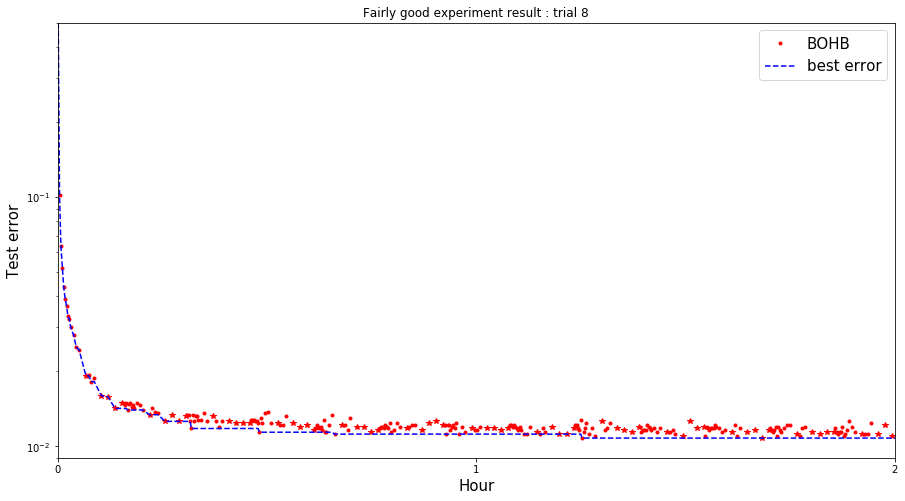

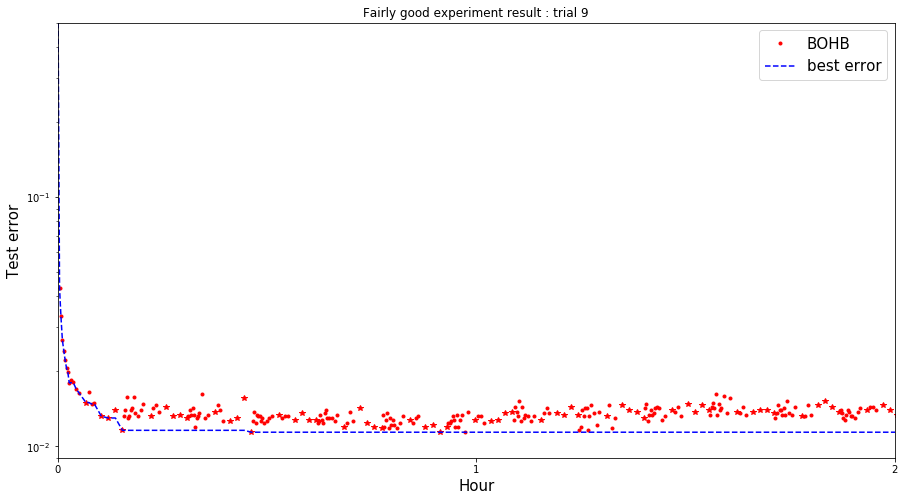

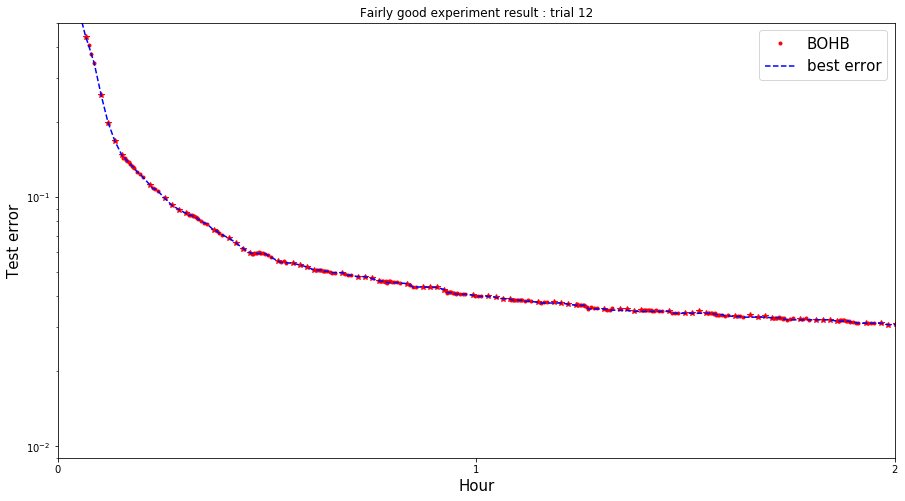

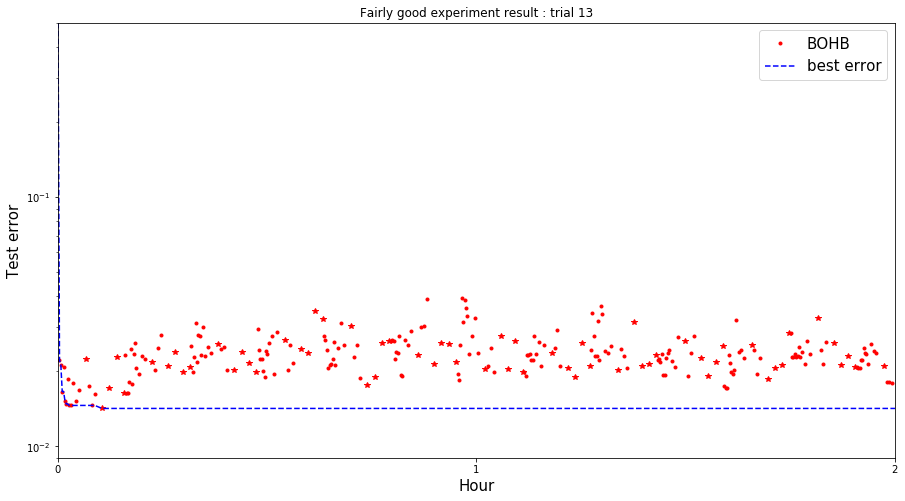

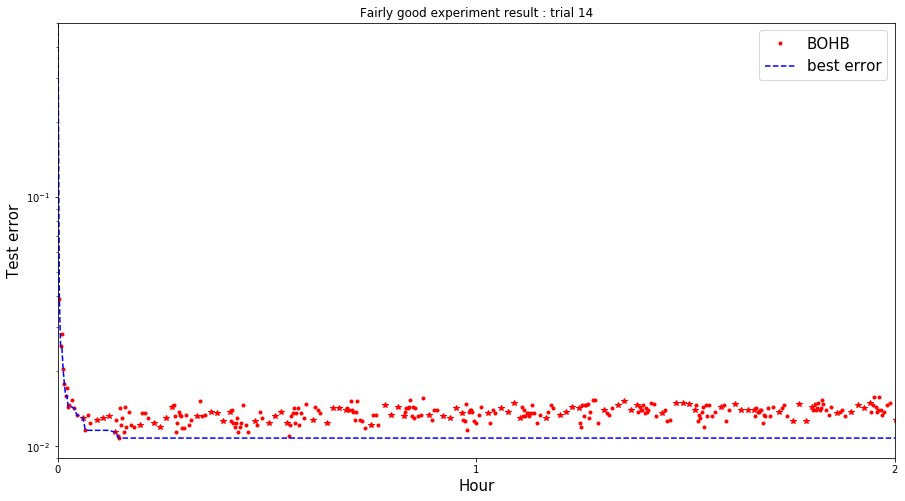

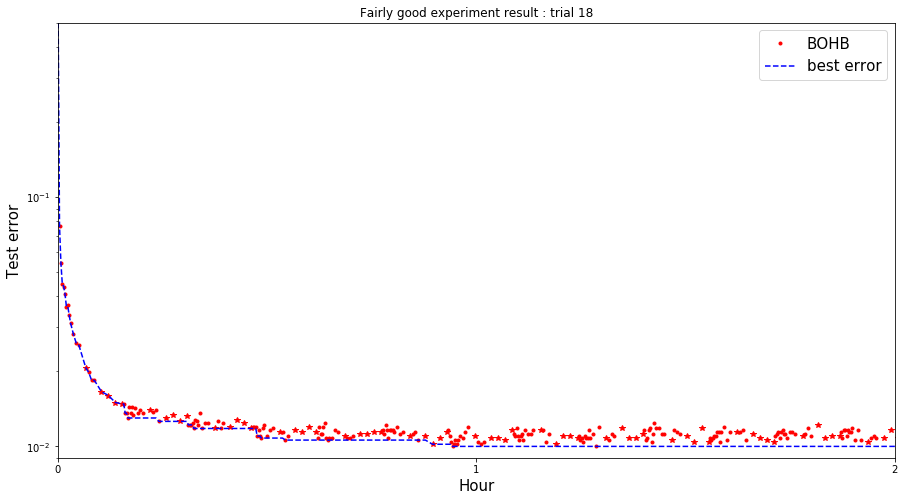

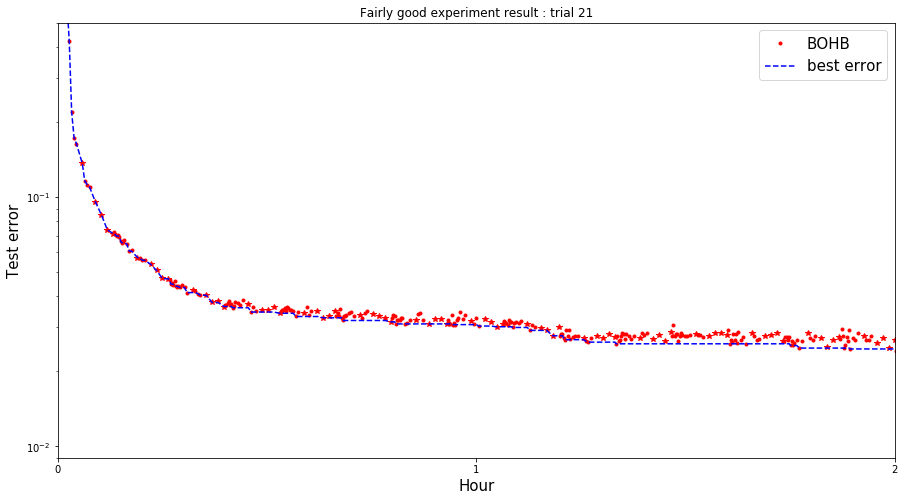

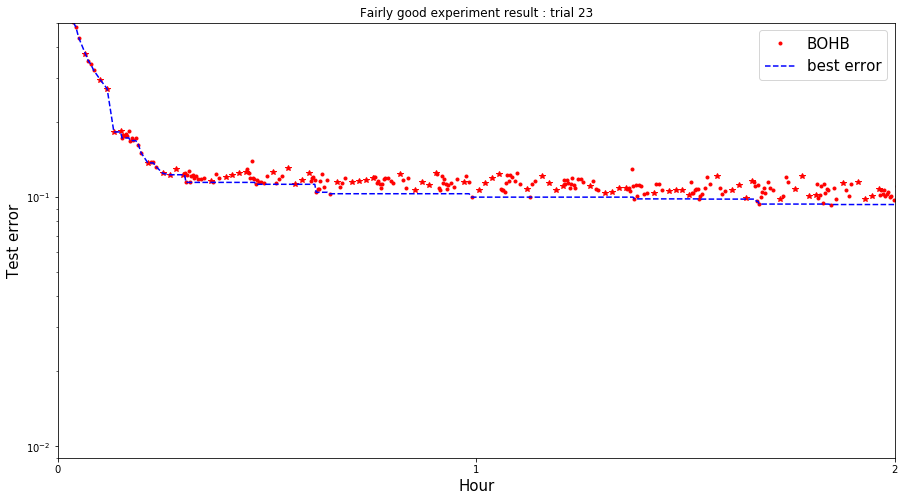

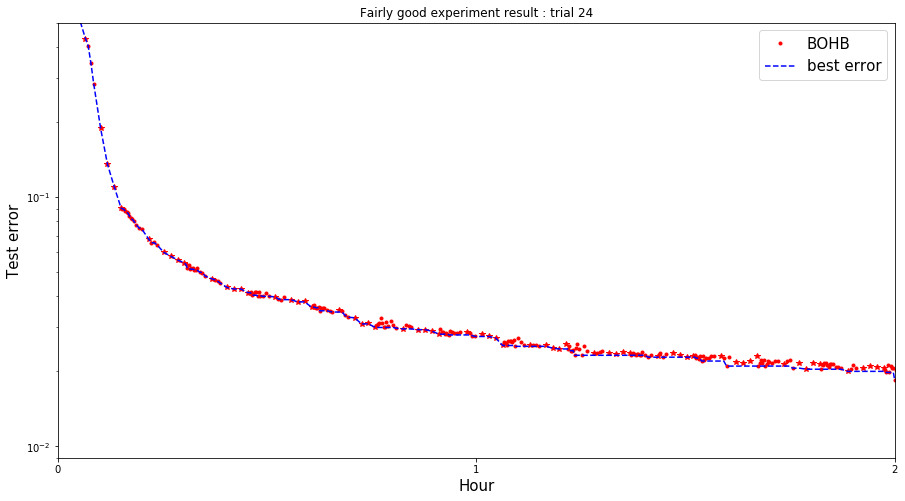

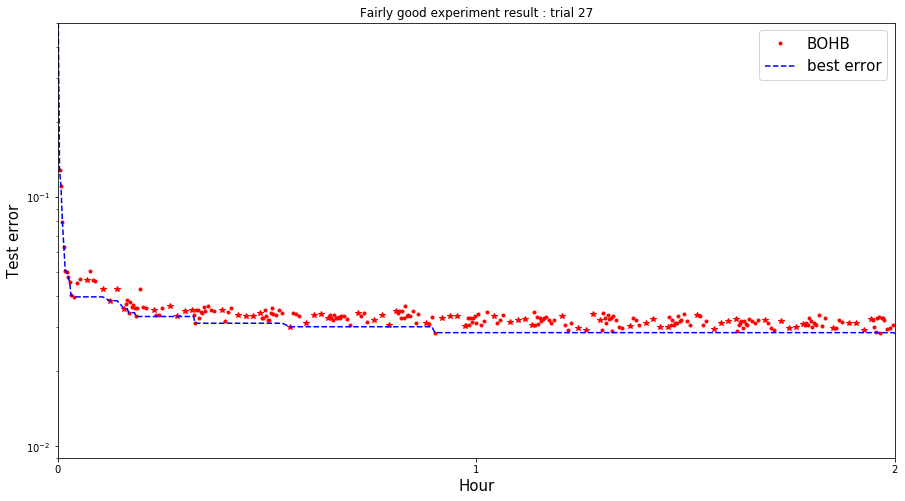

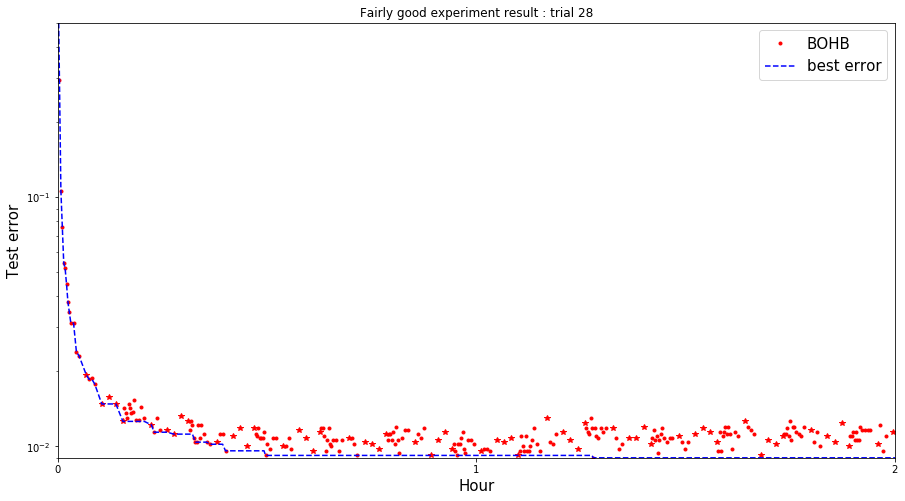

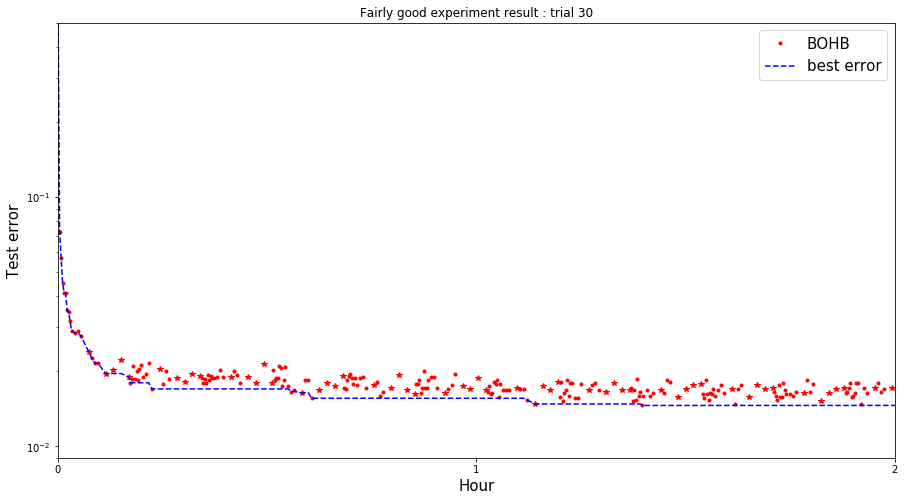

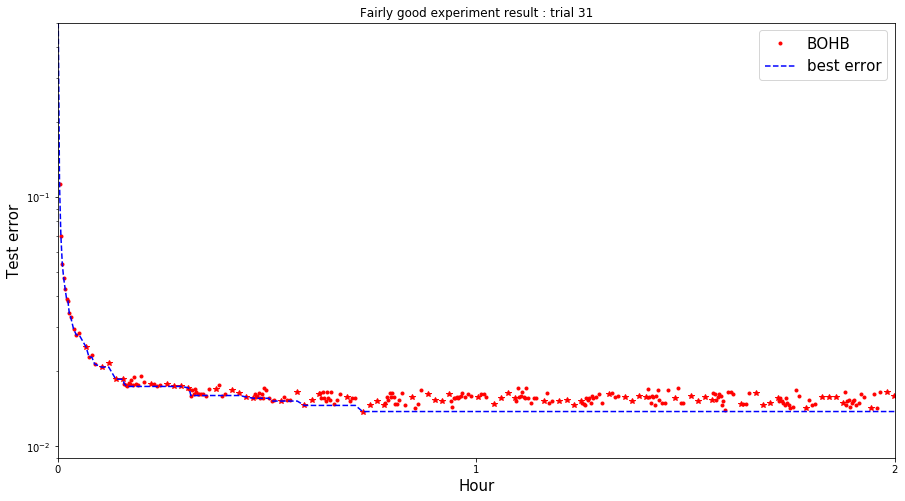

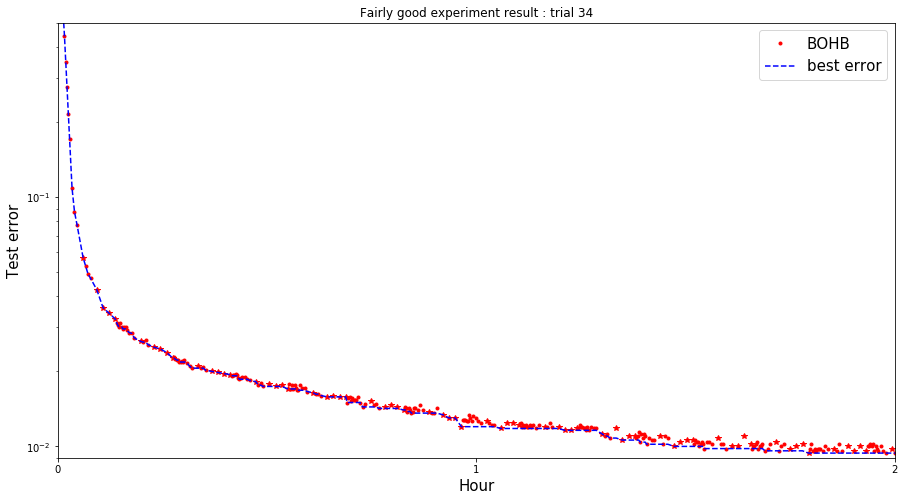

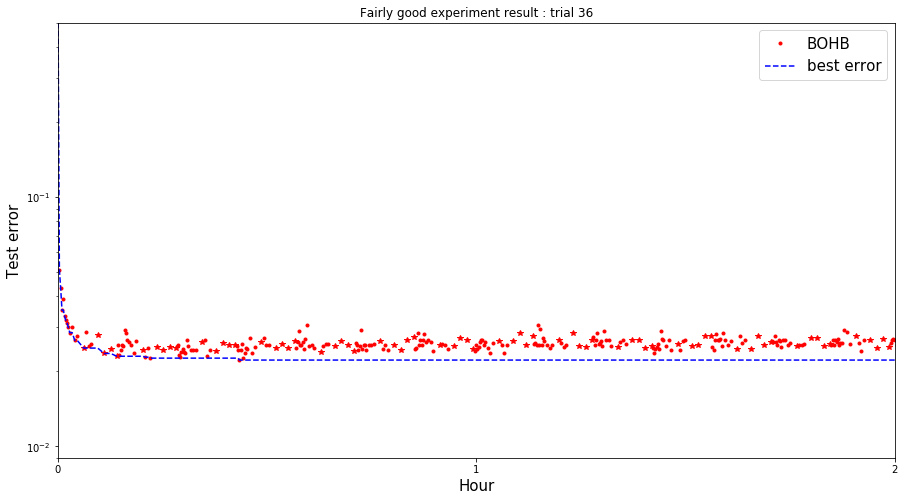

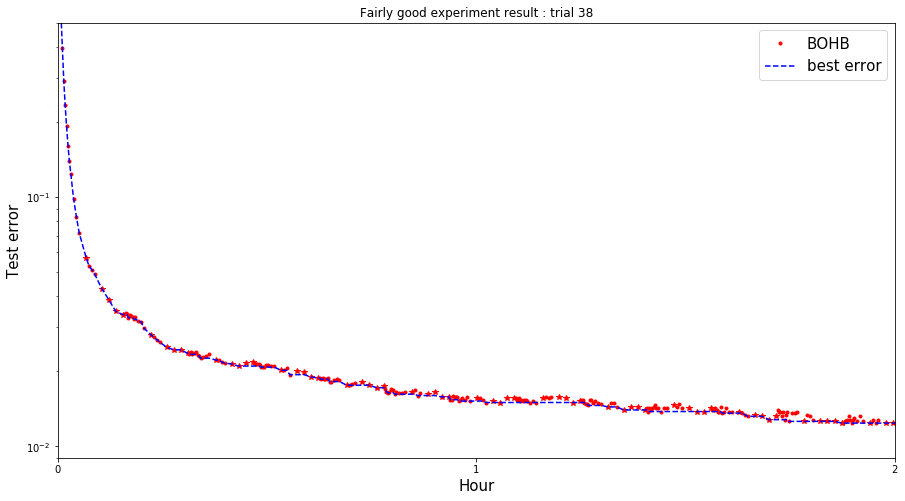

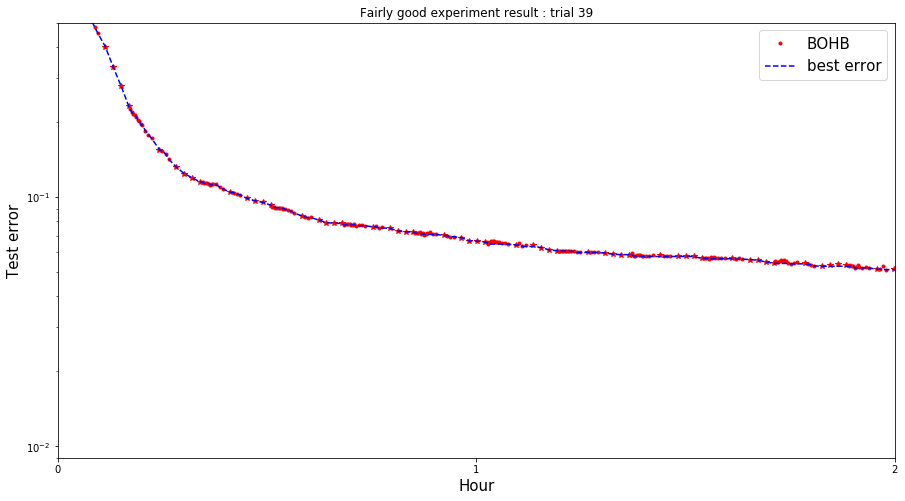

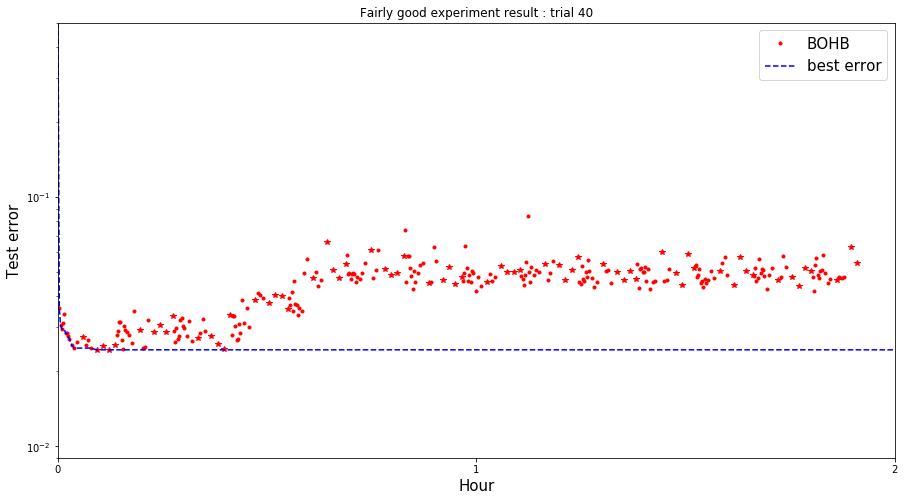

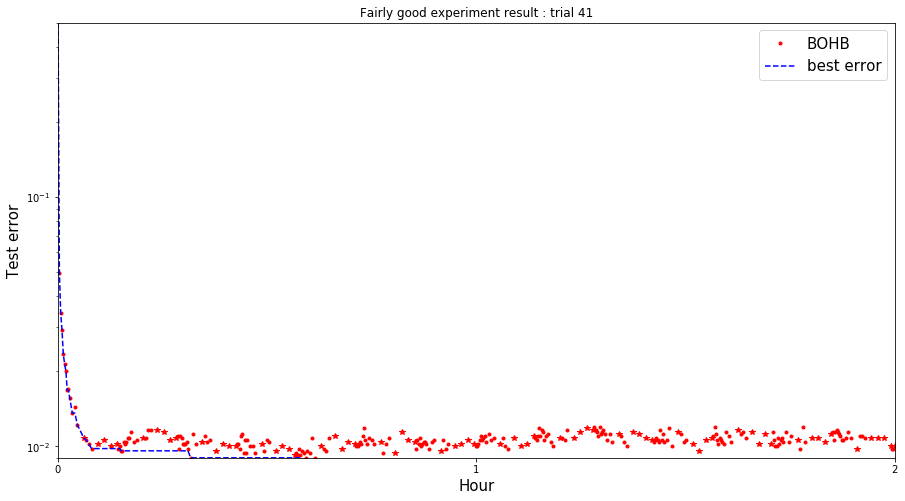

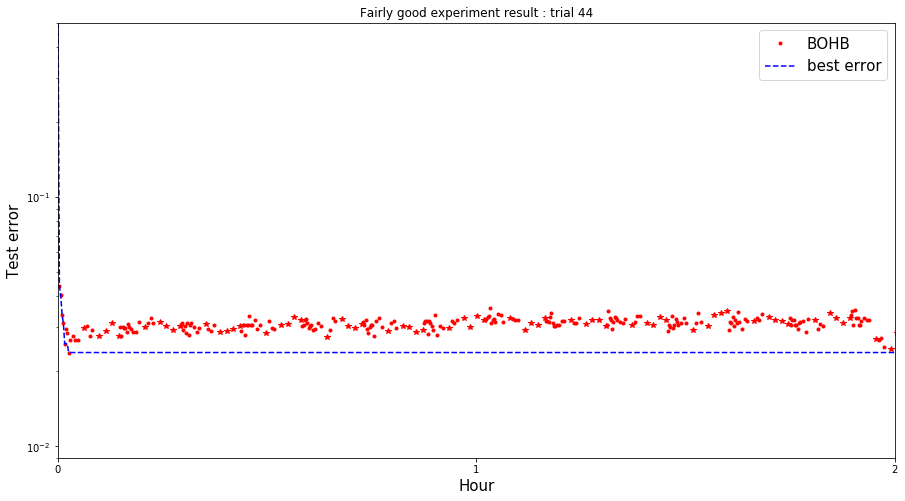

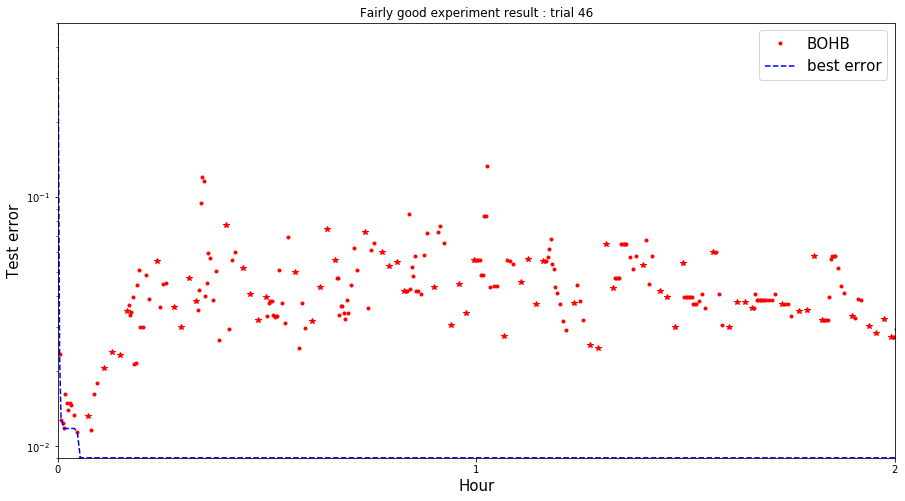

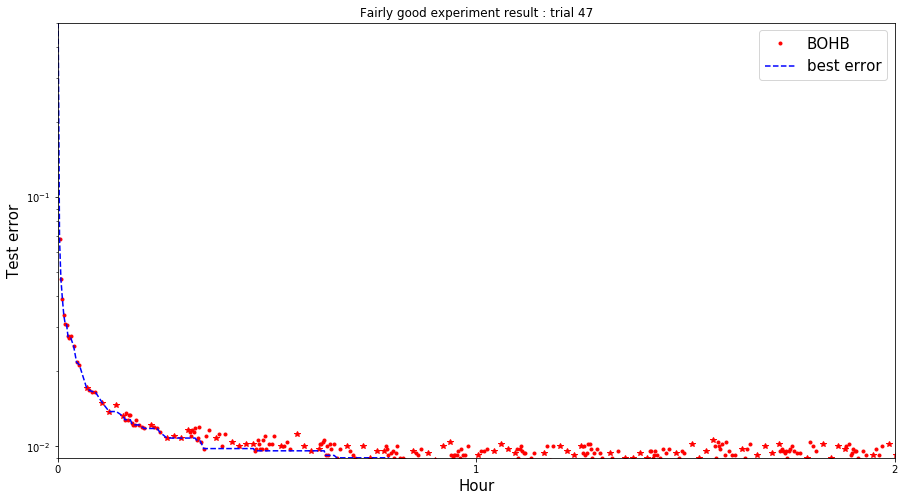

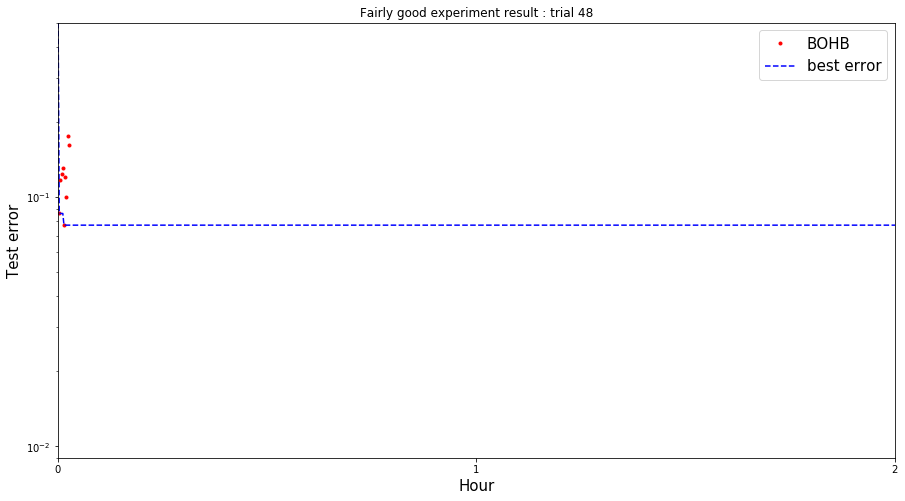

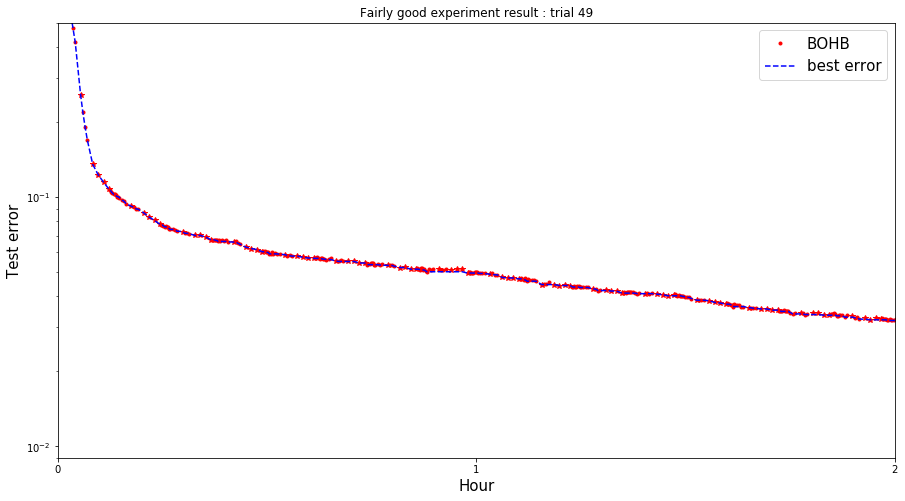

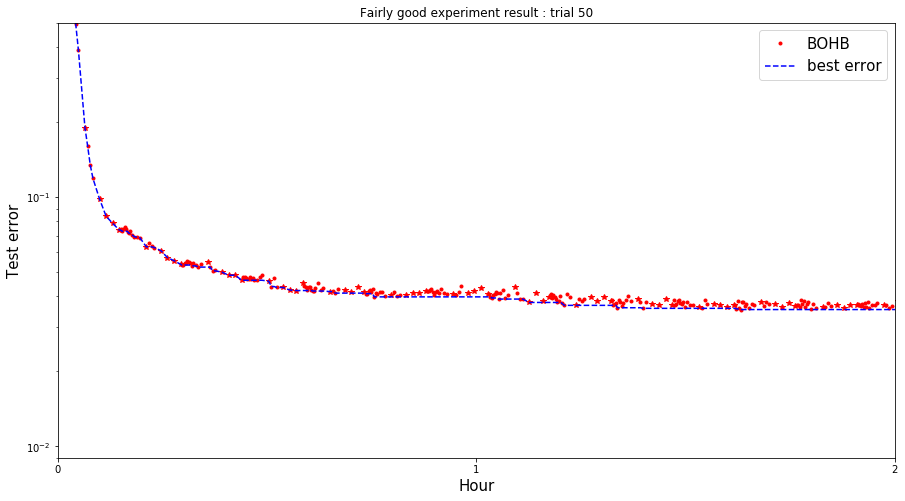

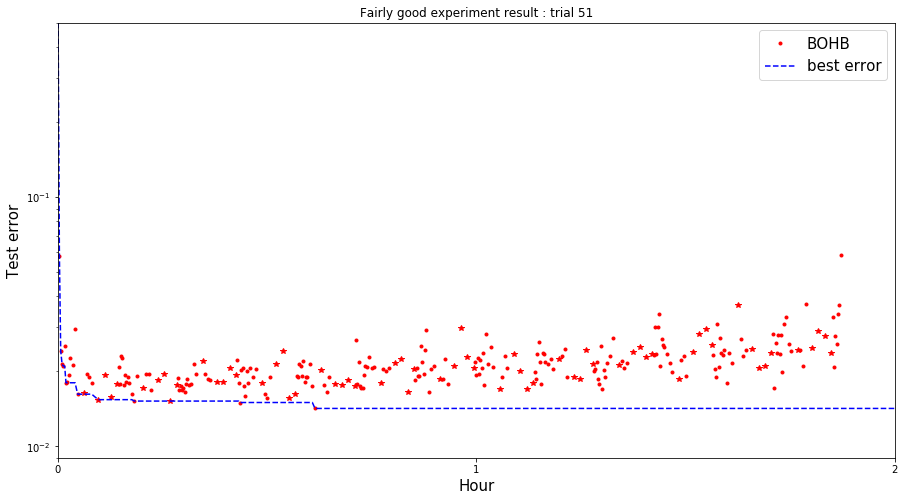

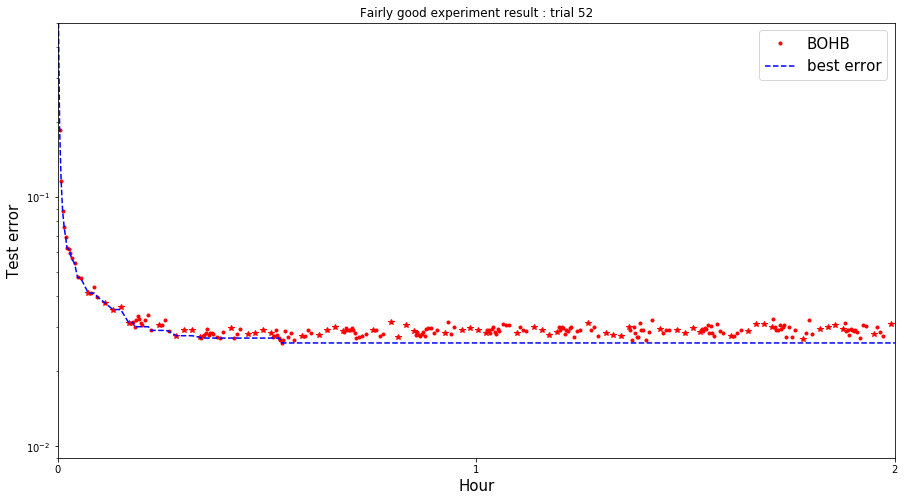

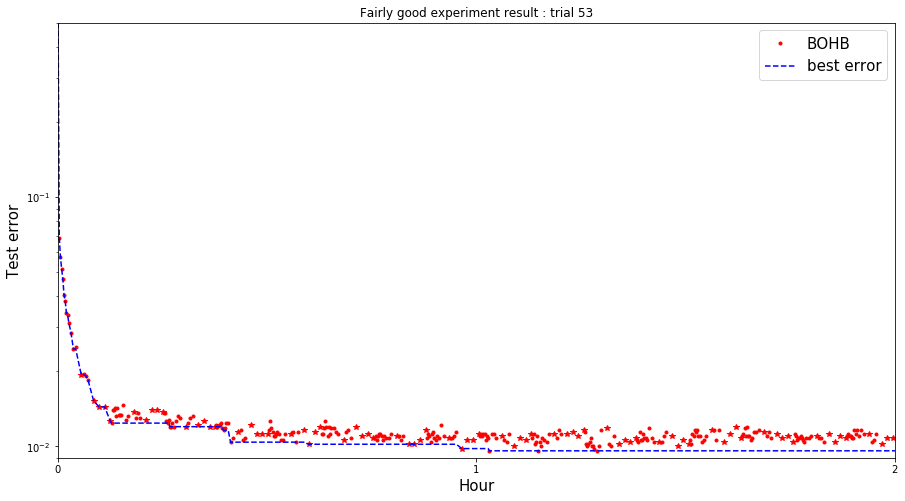

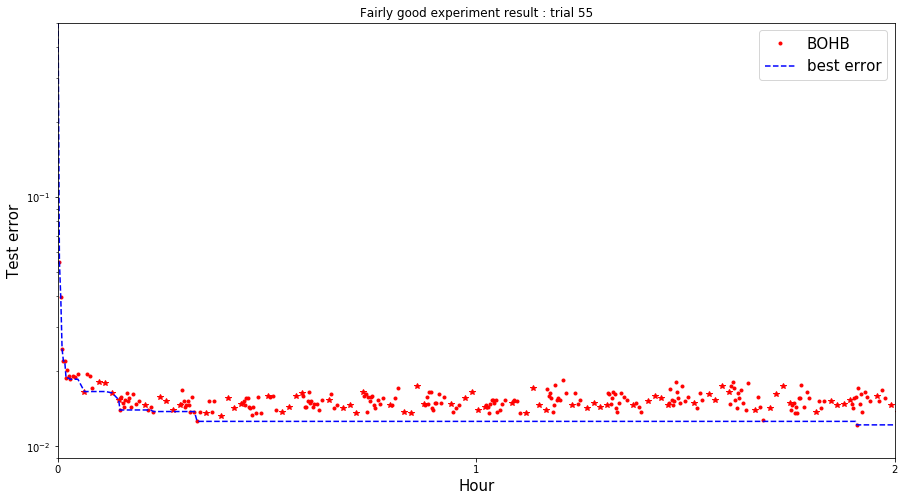

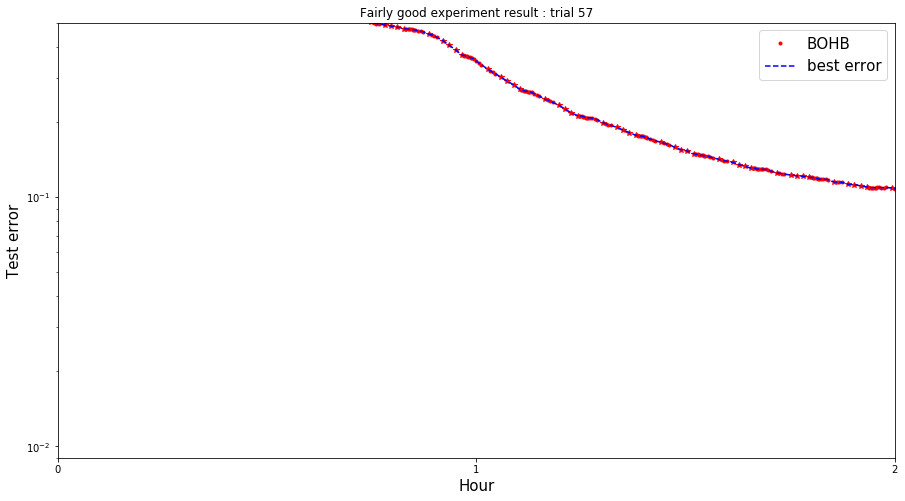

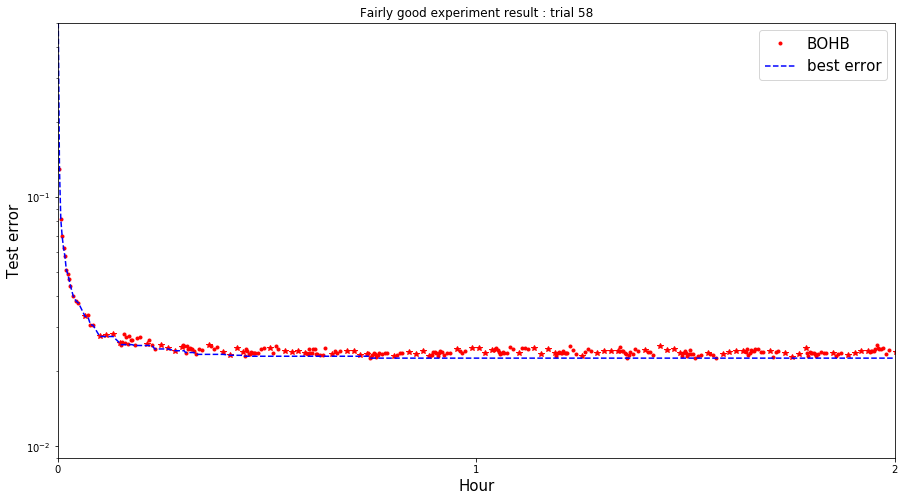

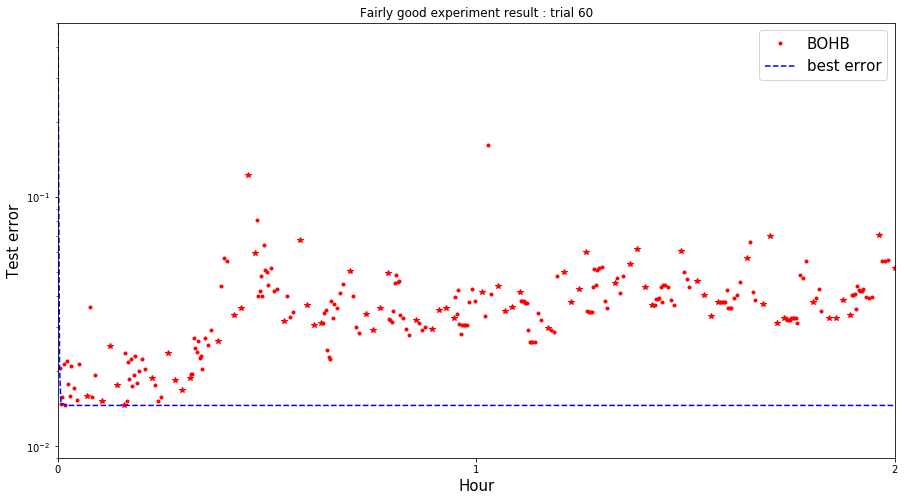

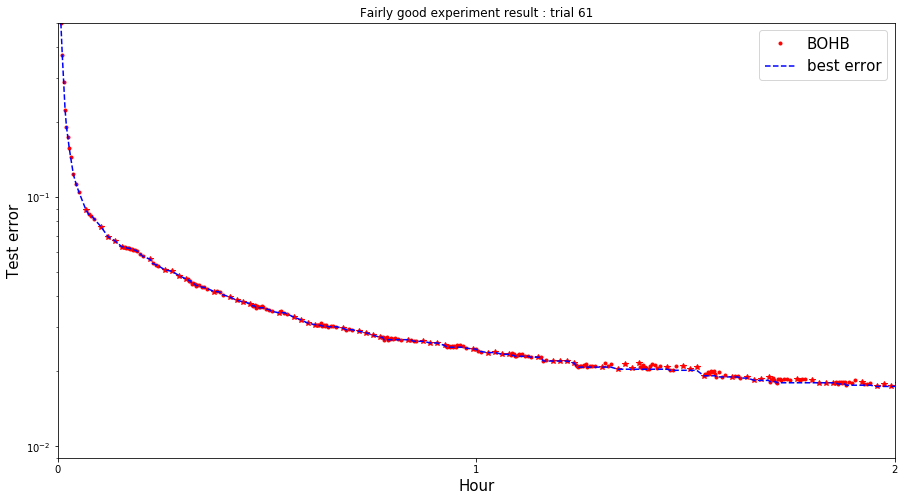

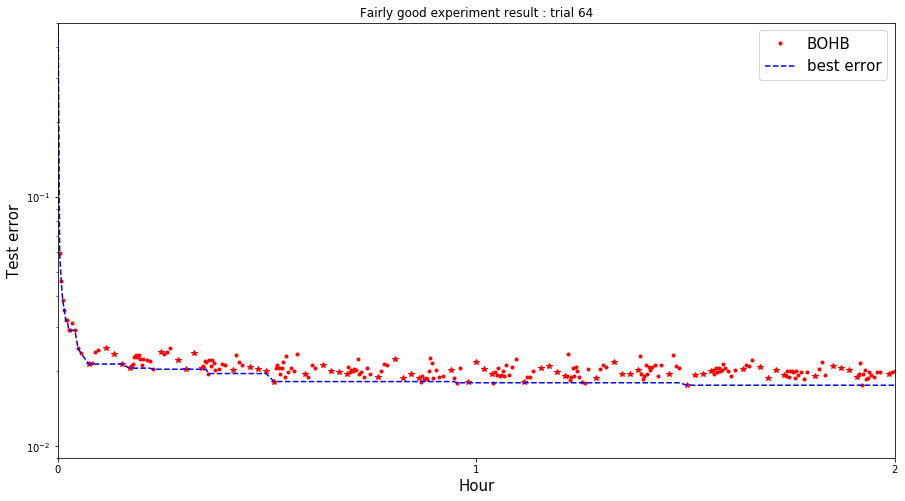

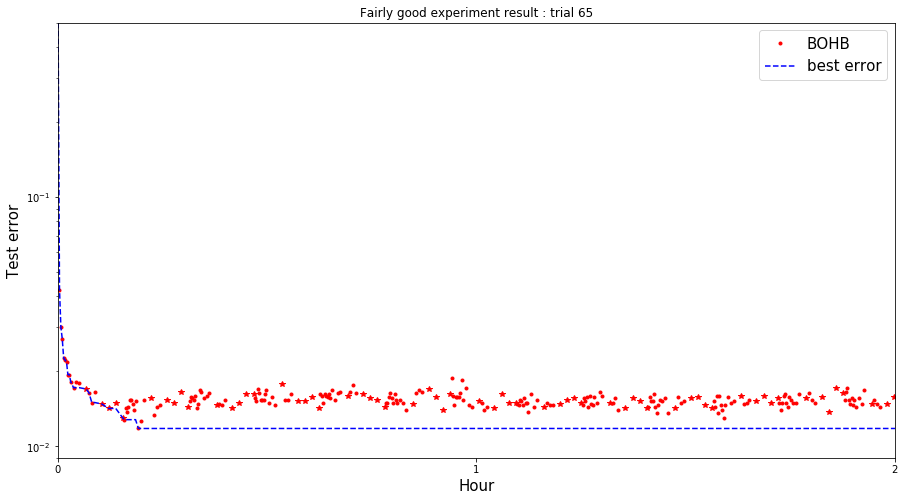

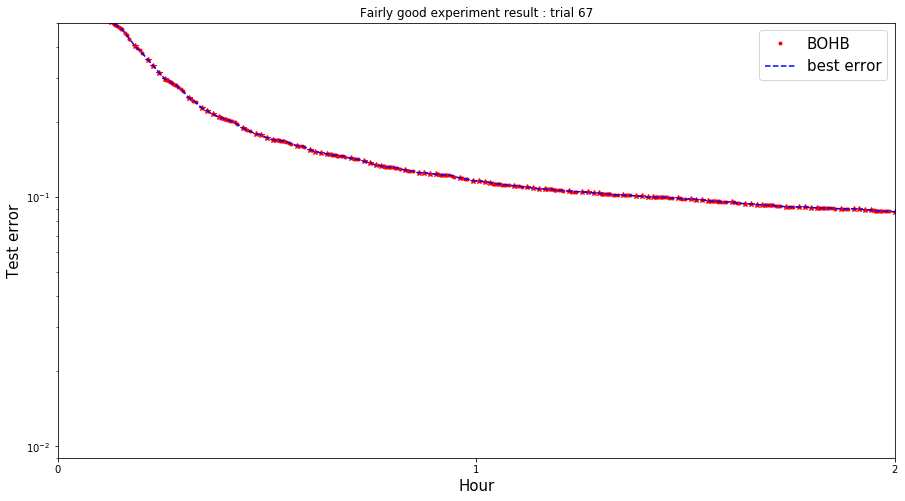

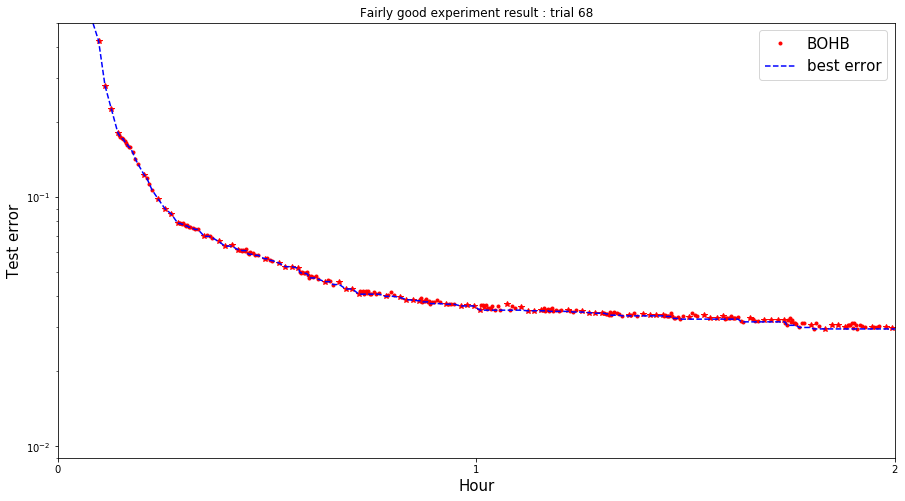

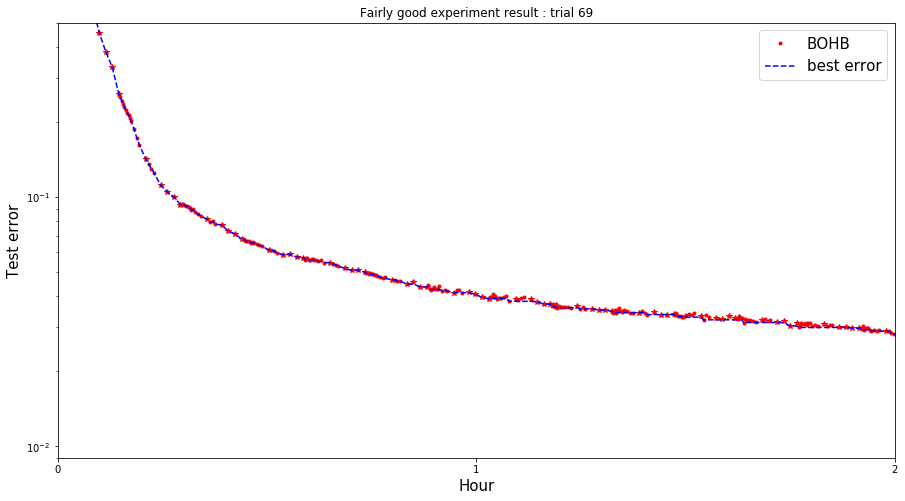

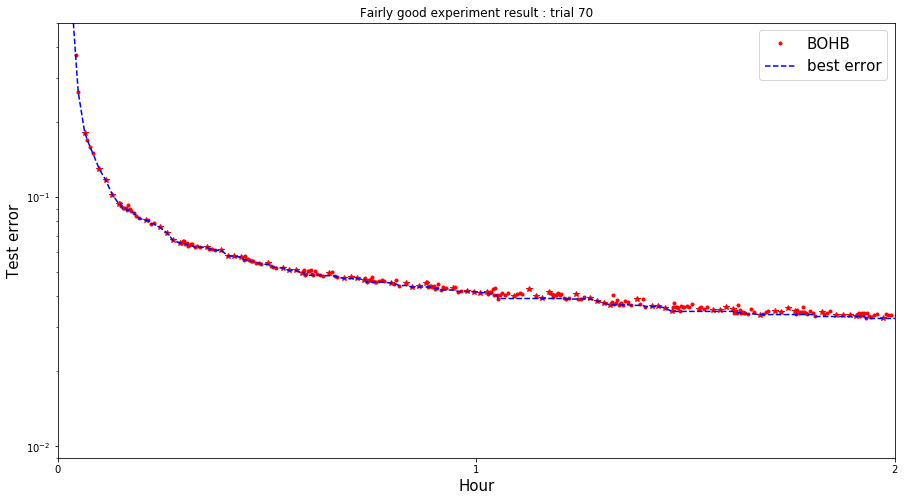

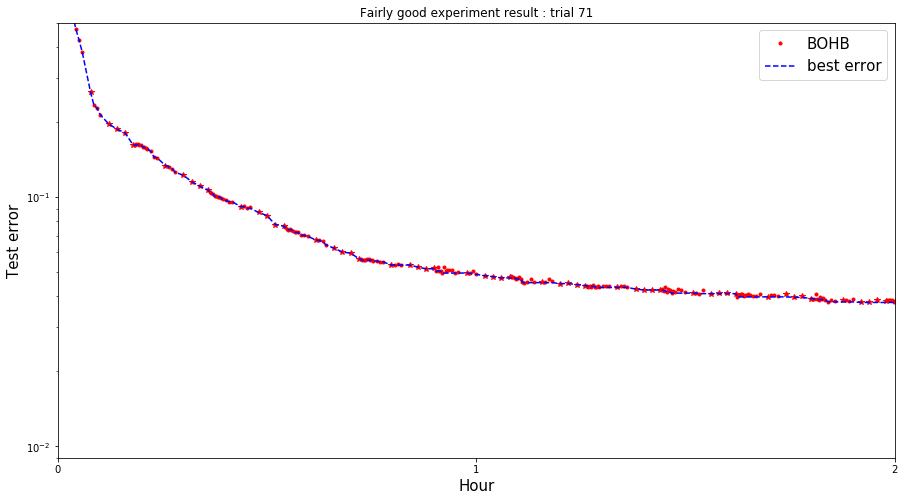

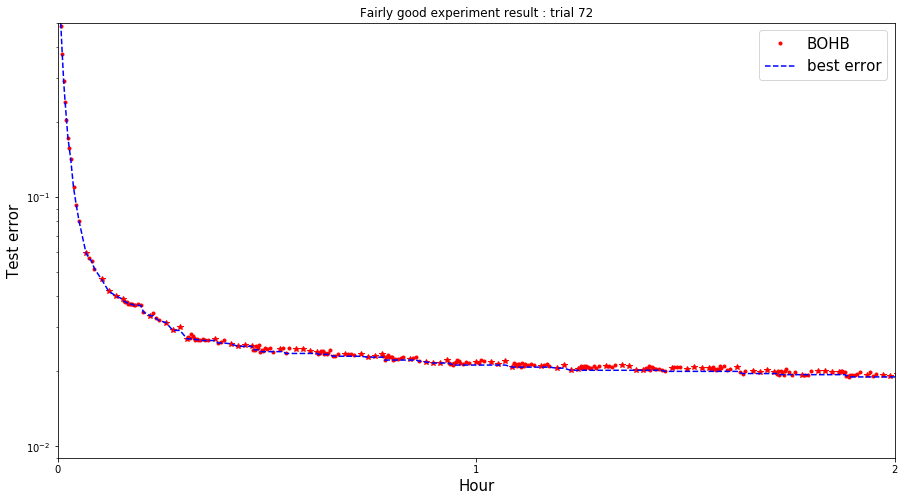

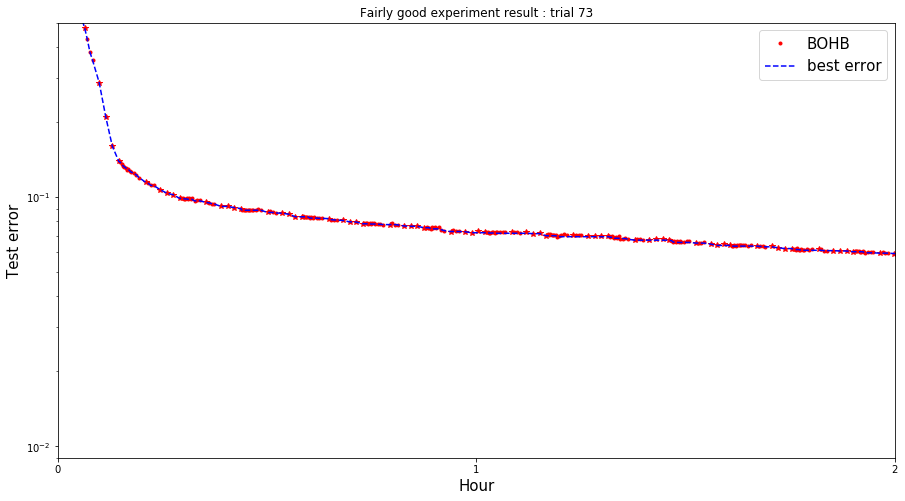

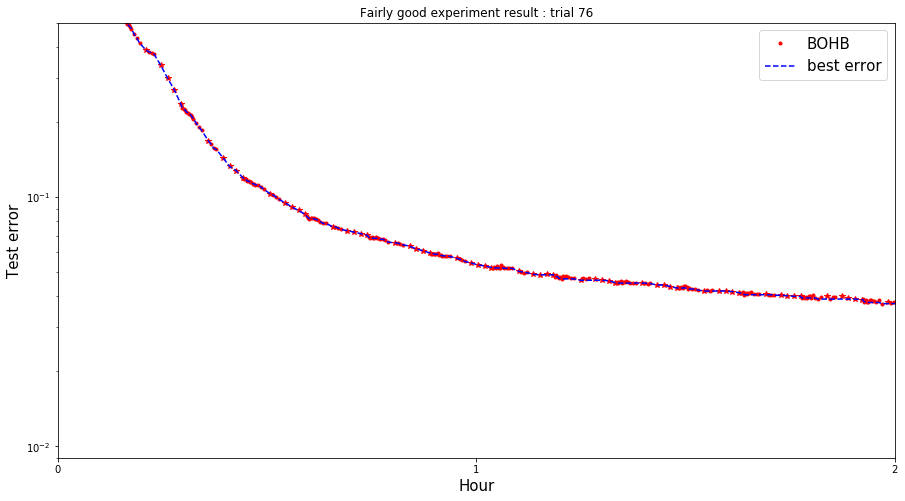

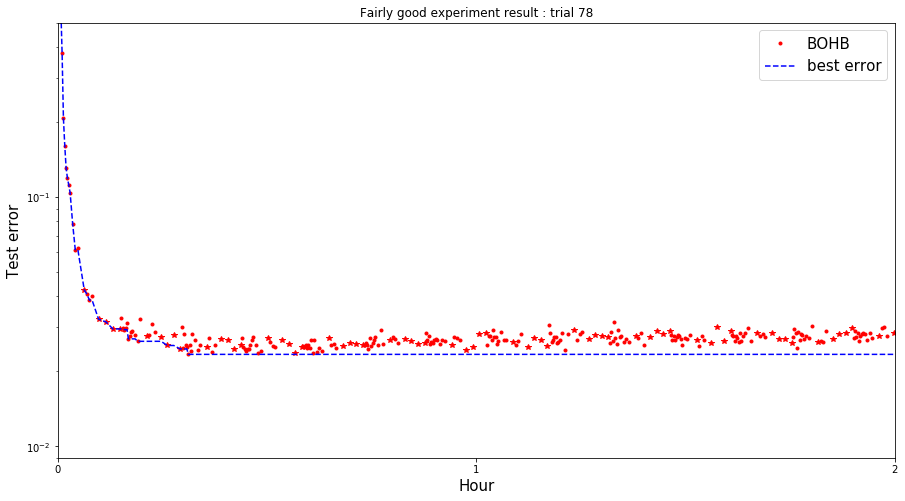

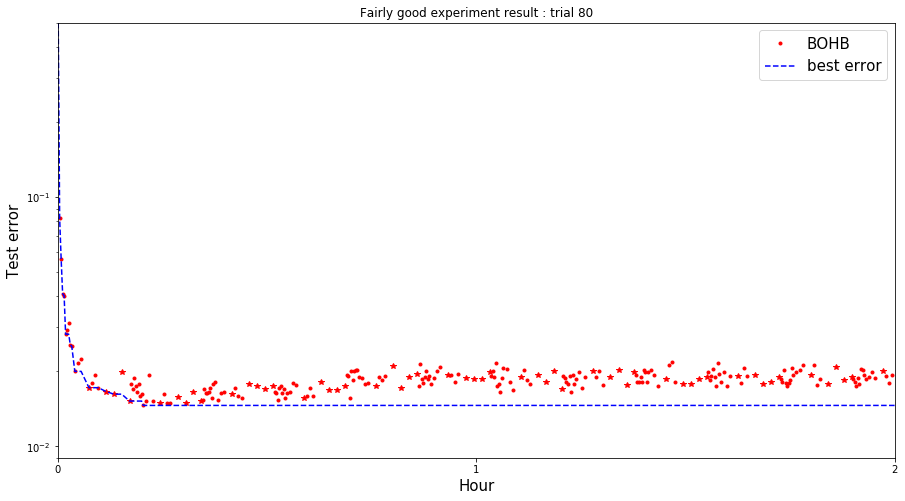

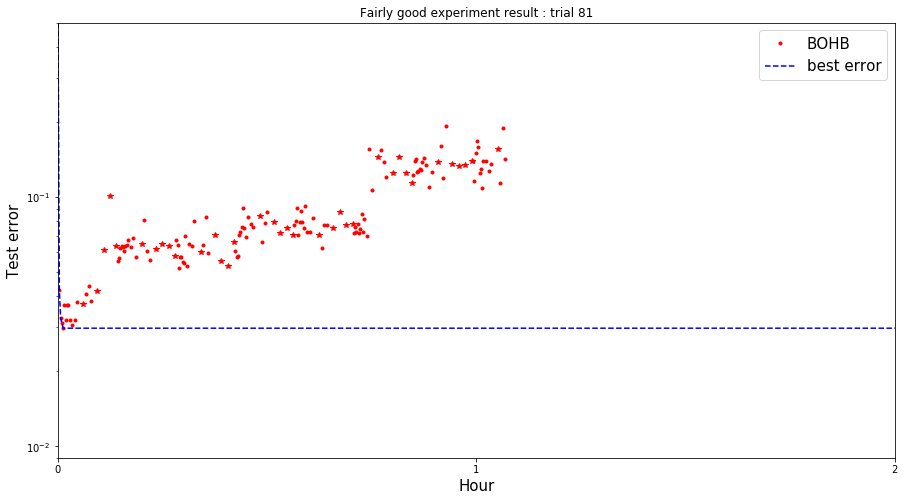

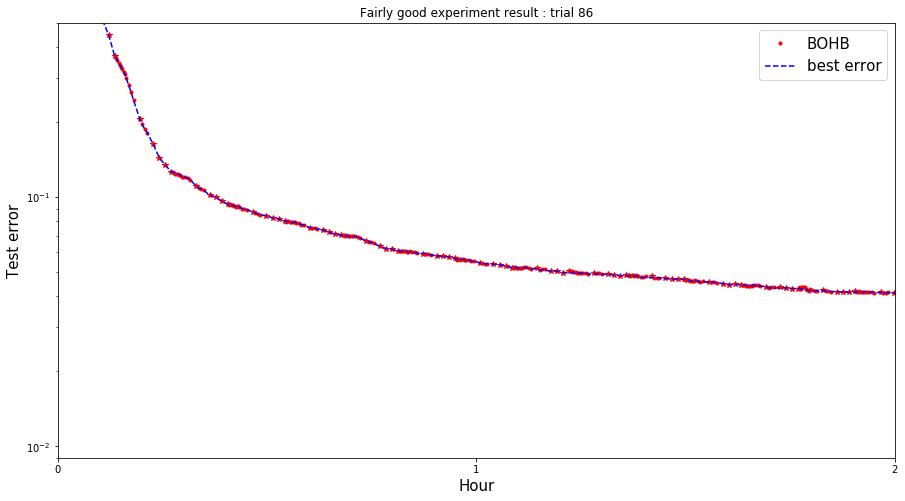

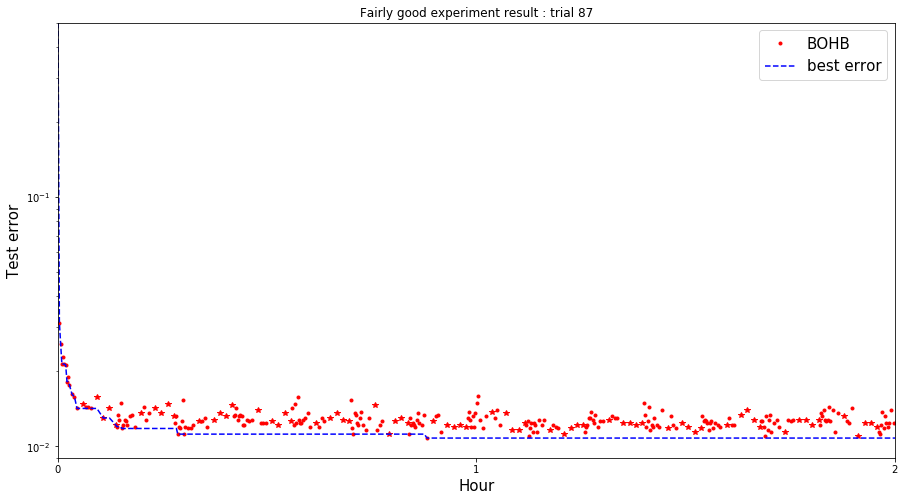

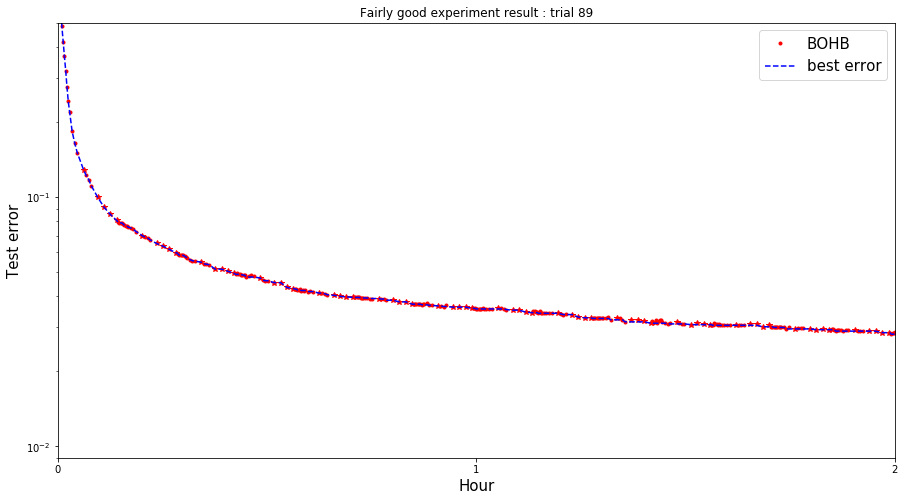

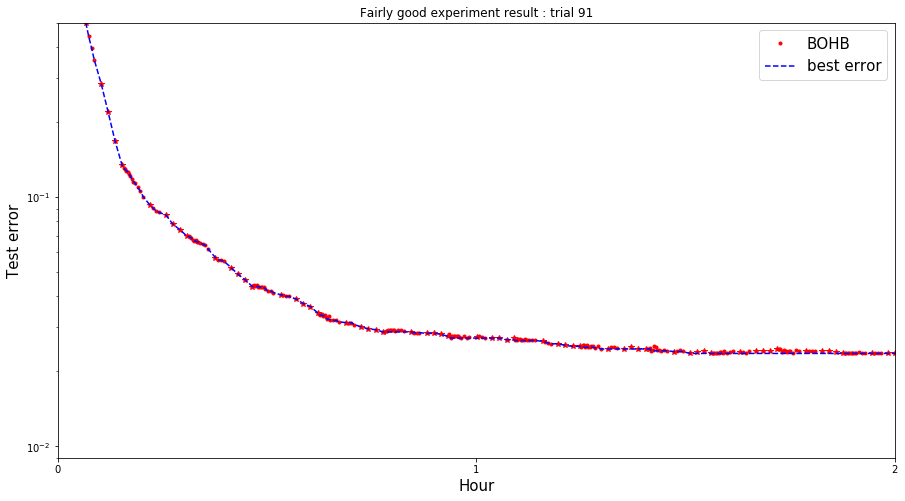

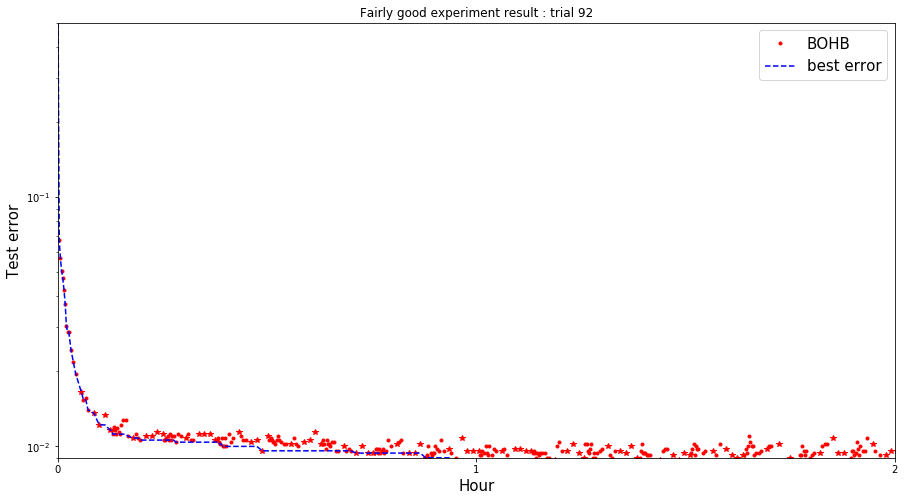

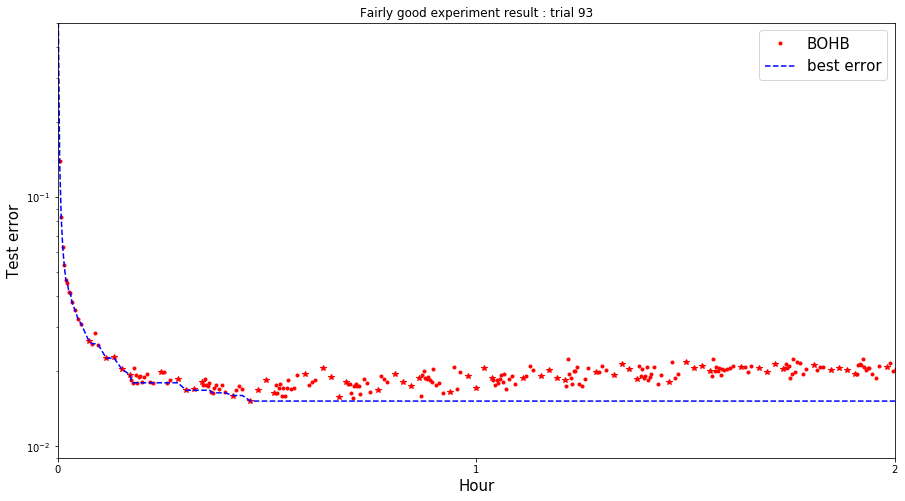

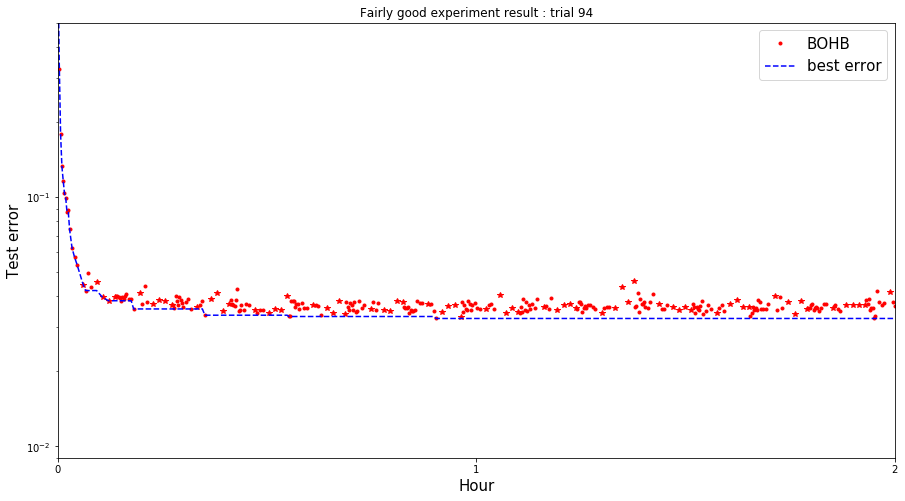

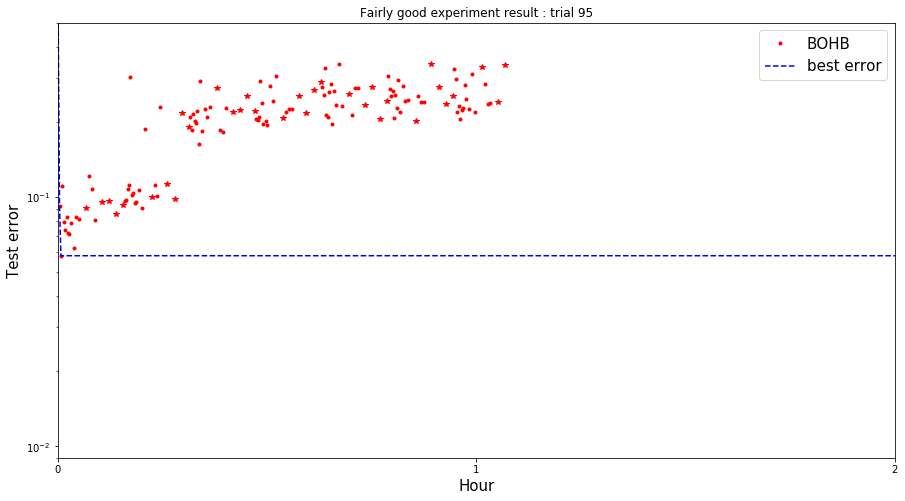

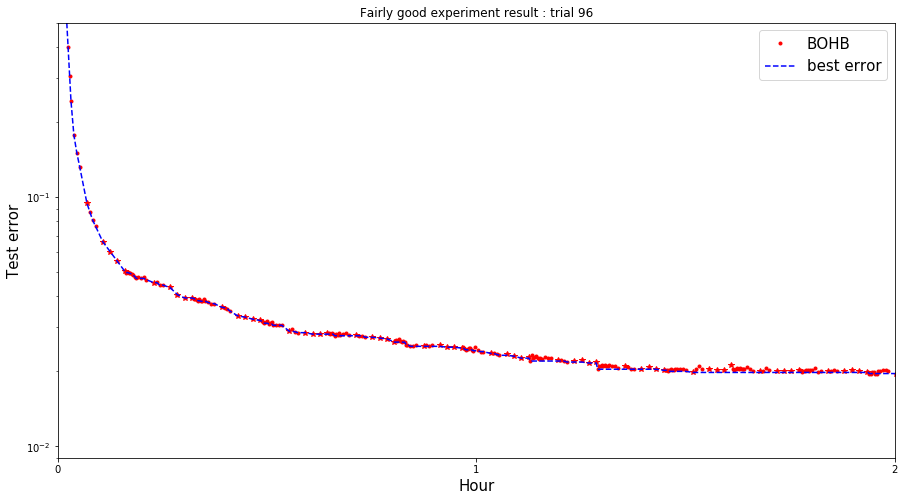

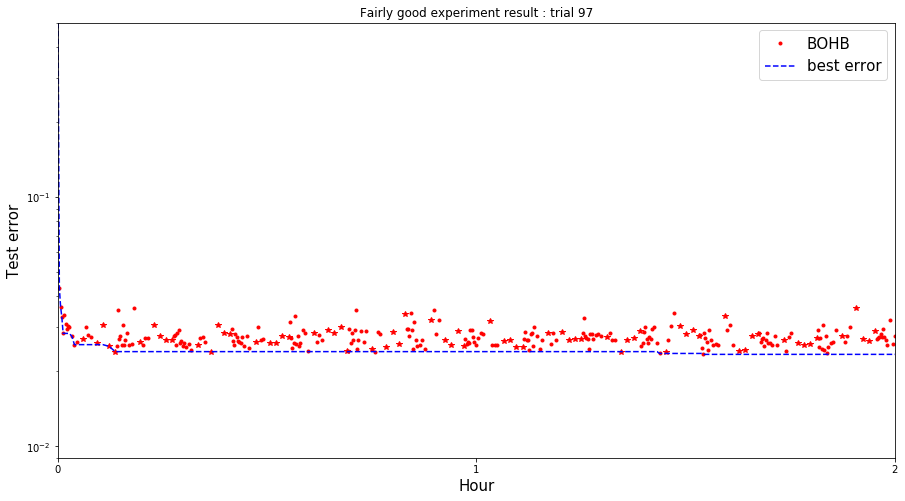

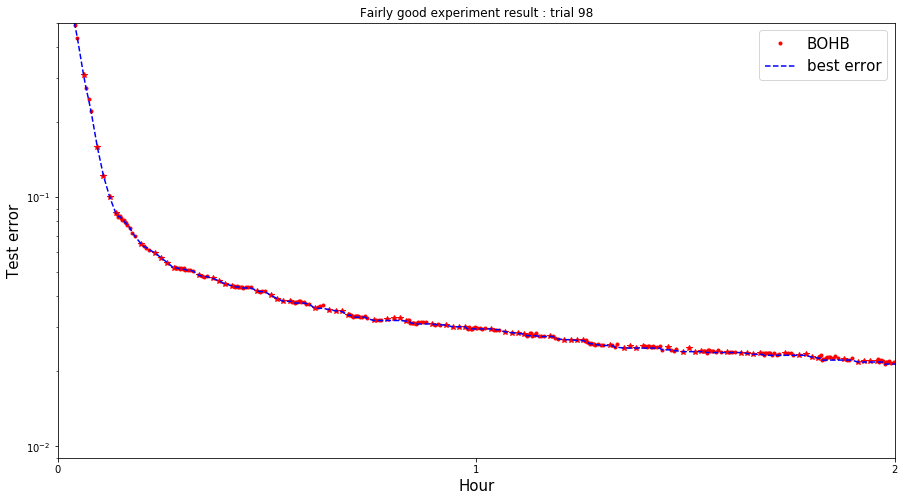

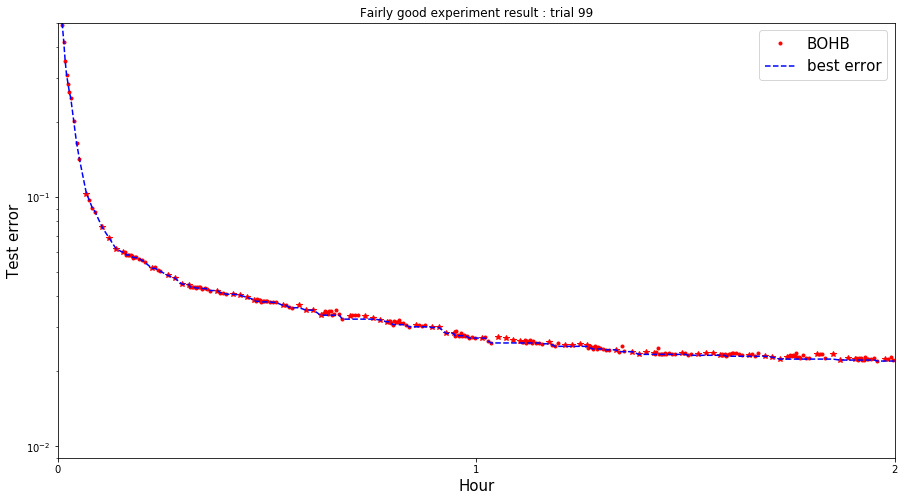

In [21]:
for i in soso_exps:
    draw_trials_curve(bohb_results, 'BOHB', i, ylim=(.009, .5), xlim=(0, 2),  title='Fairly good experiment result : trial {}'.format(i),
                      width=15, height=8, loc=1 )